<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Check-what-hardware-Keras-is-using" data-toc-modified-id="Check-what-hardware-Keras-is-using-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Check what hardware Keras is using</a></span></li><li><span><a href="#Load-Ticker-Data" data-toc-modified-id="Load-Ticker-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load Ticker Data</a></span></li><li><span><a href="#Shape-ticker-data-for-features" data-toc-modified-id="Shape-ticker-data-for-features-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Shape ticker data for features</a></span><ul class="toc-item"><li><span><a href="#Align-Ticker-Data" data-toc-modified-id="Align-Ticker-Data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Align Ticker Data</a></span></li><li><span><a href="#Modify-Time-Spans" data-toc-modified-id="Modify-Time-Spans-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Modify Time Spans</a></span></li><li><span><a href="#Adding-Sentiment-information" data-toc-modified-id="Adding-Sentiment-information-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Adding Sentiment information</a></span></li><li><span><a href="#Construct-%-price-change-label" data-toc-modified-id="Construct-%-price-change-label-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Construct % price change label</a></span></li><li><span><a href="#*-Construct-Binary-label-to-capture-up-or-down-movement-between-days" data-toc-modified-id="*-Construct-Binary-label-to-capture-up-or-down-movement-between-days-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>* Construct Binary label to capture up or down movement between days</a></span></li></ul></li><li><span><a href="#specify-the-output" data-toc-modified-id="specify-the-output-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>specify the output</a></span></li><li><span><a href="#Combine-the-ticker-and-sentiment-data-together" data-toc-modified-id="Combine-the-ticker-and-sentiment-data-together-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Combine the ticker and sentiment data together</a></span></li><li><span><a href="#Construction-of-Features-&amp;-Labels" data-toc-modified-id="Construction-of-Features-&amp;-Labels-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Construction of Features &amp; Labels</a></span><ul class="toc-item"><li><span><a href="#Define-Features" data-toc-modified-id="Define-Features-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Define Features</a></span></li></ul></li><li><span><a href="#Benchmark-Model---Linear-Regression" data-toc-modified-id="Benchmark-Model---Linear-Regression-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Benchmark Model - Linear Regression</a></span><ul class="toc-item"><li><span><a href="#T1-Benchmark" data-toc-modified-id="T1-Benchmark-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>T1 Benchmark</a></span></li><li><span><a href="#T2-Benchmark" data-toc-modified-id="T2-Benchmark-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>T2 Benchmark</a></span></li><li><span><a href="#T3-Benchmark" data-toc-modified-id="T3-Benchmark-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>T3 Benchmark</a></span></li></ul></li><li><span><a href="#Build-CNN" data-toc-modified-id="Build-CNN-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Build CNN</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Group-1" data-toc-modified-id="Group-1-9.0.1"><span class="toc-item-num">9.0.1&nbsp;&nbsp;</span>Group 1</a></span></li><li><span><a href="#Group-2" data-toc-modified-id="Group-2-9.0.2"><span class="toc-item-num">9.0.2&nbsp;&nbsp;</span>Group 2</a></span></li><li><span><a href="#Group-3" data-toc-modified-id="Group-3-9.0.3"><span class="toc-item-num">9.0.3&nbsp;&nbsp;</span>Group 3</a></span></li><li><span><a href="#Group-4" data-toc-modified-id="Group-4-9.0.4"><span class="toc-item-num">9.0.4&nbsp;&nbsp;</span>Group 4</a></span></li></ul></li><li><span><a href="#T1:-Predict-Price" data-toc-modified-id="T1:-Predict-Price-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>T1: Predict Price</a></span><ul class="toc-item"><li><span><a href="#Train" data-toc-modified-id="Train-9.1.1"><span class="toc-item-num">9.1.1&nbsp;&nbsp;</span>Train</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-9.1.2"><span class="toc-item-num">9.1.2&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Architecture-Summary" data-toc-modified-id="Architecture-Summary-9.1.3"><span class="toc-item-num">9.1.3&nbsp;&nbsp;</span>Architecture Summary</a></span></li></ul></li><li><span><a href="#T2:-Predict-Percentage-Change" data-toc-modified-id="T2:-Predict-Percentage-Change-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>T2: Predict Percentage Change</a></span><ul class="toc-item"><li><span><a href="#Train" data-toc-modified-id="Train-9.2.1"><span class="toc-item-num">9.2.1&nbsp;&nbsp;</span>Train</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-9.2.2"><span class="toc-item-num">9.2.2&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Architecture-Summary" data-toc-modified-id="Architecture-Summary-9.2.3"><span class="toc-item-num">9.2.3&nbsp;&nbsp;</span>Architecture Summary</a></span></li></ul></li><li><span><a href="#T3:-Predict-Up/Down-Movement" data-toc-modified-id="T3:-Predict-Up/Down-Movement-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>T3: Predict Up/Down Movement</a></span><ul class="toc-item"><li><span><a href="#Train" data-toc-modified-id="Train-9.3.1"><span class="toc-item-num">9.3.1&nbsp;&nbsp;</span>Train</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-9.3.2"><span class="toc-item-num">9.3.2&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Architecture-Summaries" data-toc-modified-id="Architecture-Summaries-9.3.3"><span class="toc-item-num">9.3.3&nbsp;&nbsp;</span>Architecture Summaries</a></span></li></ul></li></ul></li></ul></div>

# Setup

This notebook will need the following libraries:

* `keras`
* `pandas`
* `numpy`
* `arrow`

It is recommended to install them through conda. 

# Check what hardware Keras is using

In [1]:
import keras

Using TensorFlow backend.


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17313994046205633081
]


# Load Ticker Data

In [3]:
import pandas as pd

In [4]:
eth_ticker_raw = pd.read_csv("data/ticker_data/USDT_ETH.csv",index_col=0).rename(columns={"Timestamp":"timestamp"})
btc_ticker_raw = pd.read_csv("data/ticker_data/USDT_BTC.csv",index_col=0).rename(columns={"Timestamp":"timestamp"})          

In [5]:
eth_ticker_raw[eth_ticker_raw.timestamp == 1439014500]

,Close,timestamp,High,Low,Open
0,1.75,1439014500,0.33,1.61,0.33


In [6]:
btc_ticker_raw.head()

,Close,timestamp,High,Low,Open
0,225.0,1424373000,0.33,225.0,0.33
1,225.0,1424373300,225.00,225.0,225.00
2,225.0,1424373600,225.00,225.0,225.00
3,225.0,1424373900,225.00,225.0,225.00
4,225.0,1424374200,225.00,225.0,225.00


In [7]:
# sync the times of the two dataframes

# Shape ticker data for features

* align the btc and eth data
* write function that can create data point windows - 5 minutes, 20 minutes, 6 hours
* create features and outputs

## Align Ticker Data

So that the btc and eth prices align

In [8]:
ticker_data_merged = eth_ticker_raw.set_index("timestamp")\
                .join(
                        btc_ticker_raw.set_index("timestamp"),
                        on="timestamp",
                        how="inner",
                        lsuffix="_eth",
                        rsuffix="_btc")

In [9]:
# checking result
ticker_data_merged.head()

,Close_eth,High_eth,Low_eth,Open_eth,Close_btc,High_btc,Low_btc,Open_btc
timestamp,,,,,,,,
1439014500,1.75,0.33,1.61,0.33,273.947811,275.603572,273.947811,275.603572
1439014800,1.85,1.85,1.85,1.85,273.905543,273.905543,273.626238,273.901814
1439015100,1.85,1.85,1.85,1.85,273.905543,273.905543,273.905543,273.905543
1439015400,1.85,1.85,1.85,1.85,273.917572,273.917572,273.917572,273.917572
1439015700,1.85,1.85,1.85,1.85,273.917572,273.917572,273.917572,273.917572


## Modify Time Spans

The Ticker prices uptill now are in 5 min windows. We want to change that to 10 minutes.

In [10]:
import numpy as np

# in minutes 
minutes = 10
data_point_bucket_size = str(minutes) + "T"

datetime = pd.to_datetime(ticker_data_merged.index,unit='s') 


agg_method = {'Close_eth': "last",
                "High_eth": np.max, 
                "Low_eth": np.min,
                "Open_eth": "first",
                "Close_btc": "last",
                "High_btc": np.max, 
                "Low_btc": np.min,
                "Open_btc": "first", 
                 }

ticker_data = ticker_data_merged.set_index(datetime)\
                                    .resample(data_point_bucket_size)\
                                    .agg(agg_method)

print("Shape of reshaped data: " + str(ticker_data.shape))
print("Shape of original data: " + str(ticker_data_merged.shape))

Shape of reshaped data: (150216, 8)
Shape of original data: (300430, 8)


In [11]:
# checking result
ticker_data.head()

,Close_eth,High_eth,Low_eth,Open_eth,Close_btc,High_btc,Low_btc,Open_btc
timestamp,,,,,,,,
2015-08-08 06:10:00,1.75,0.33,1.61,0.33,273.947811,275.603572,273.947811,275.603572
2015-08-08 06:20:00,1.85,1.85,1.85,1.85,273.905543,273.905543,273.626238,273.901814
2015-08-08 06:30:00,1.85,1.85,1.85,1.85,273.917572,273.917572,273.917572,273.917572
2015-08-08 06:40:00,1.85,1.85,1.85,1.85,273.917572,273.917572,273.917572,273.917572
2015-08-08 06:50:00,1.71,1.71,1.71,1.71,274.155050,274.155050,274.155050,274.155050


## Adding Sentiment information

From the research it looked like sentiments from 4-2 days ago yielded the best results.

In [12]:
import pandas as pd

In [13]:
# checking if data is being read in correctly
sentiment = pd.read_parquet("data/features/sentiment_features")
sentiment.head(5000).dropna()

,avg_reddit_eth_compound_vader,avg_reddit_eth_pos_vader,avg_reddit_eth_neg_vader,avg_reddit_eth_polarity_textblob,avg_reddit_eth_subjectivity_textblob,avg_reddit_btc_compound_vader,avg_reddit_btc_pos_vader,avg_reddit_btc_neg_vader,avg_reddit_btc_polarity_textblob,avg_reddit_btc_subjectivity_textblob,...,avg_4day_twitter_btc_compound_vader,avg_4day_twitter_btc_pos_vader,avg_4day_twitter_btc_neg_vader,avg_4day_twitter_btc_polarity_textblob,avg_4day_twitter_btc_subjectivity_textblob,avg_4day_twitter_compound_vader,avg_4day_twitter_pos_vader,avg_4day_twitter_neg_vader,avg_4day_twitter_polarity_textblob,avg_4day_twitter_subjectivity_textblob
2016-01-05 00:00:00,0.921400,0.802000,0.288000,0.629557,0.533333,0.539011,0.205667,0.085625,0.127882,0.417544,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-01-05 00:10:00,0.222350,0.566000,0.314500,0.089779,0.641667,0.488052,0.182302,0.081590,0.140953,0.501798,...,0.609873,0.293585,0.153375,0.167216,0.262328,0.609355,0.293298,0.153375,0.182638,0.264452
2016-01-05 00:20:00,-0.476700,0.330000,0.341000,-0.450000,0.750000,0.437094,0.158937,0.077556,0.154024,0.586052,...,0.592523,0.292128,0.155138,0.182643,0.277187,-0.058188,0.288767,0.151118,0.250259,0.547621
2016-01-05 00:30:00,0.659700,0.094000,0.270250,0.104167,0.245833,0.109513,0.126000,0.172467,0.078175,0.506584,...,0.575172,0.290671,0.156902,0.198070,0.292047,-0.027525,0.229029,0.152429,0.285345,0.534792
2016-01-05 00:40:00,0.704967,0.097000,0.199500,0.093287,0.369213,0.155755,0.138048,0.152111,0.100183,0.483497,...,0.557821,0.289215,0.158665,0.213497,0.306906,0.351197,0.196920,0.198200,0.385520,0.537183
2016-01-05 00:50:00,0.750233,0.100000,0.128750,0.082407,0.492593,0.201996,0.150095,0.131756,0.122192,0.460409,...,0.540471,0.287758,0.160429,0.228924,0.321766,0.474006,0.252839,0.154000,0.296414,0.531020
2016-01-05 01:00:00,0.795500,0.103000,0.058000,0.071528,0.615972,0.248237,0.162143,0.111400,0.144201,0.437322,...,0.523120,0.286301,0.162192,0.244350,0.336625,0.405348,0.223650,0.150333,0.256415,0.445263
2016-01-05 01:10:00,0.819950,0.161000,0.016000,0.288907,0.627958,0.246671,0.154571,0.099600,0.082043,0.458287,...,0.505770,0.284844,0.163956,0.259777,0.351484,0.592418,0.272787,0.190800,0.163267,0.279567
2016-01-05 01:20:00,0.825612,0.183500,0.043800,0.288555,0.589719,0.013919,0.129429,0.133800,0.107683,0.475771,...,0.488419,0.283387,0.165719,0.275204,0.366344,0.315339,0.226346,0.313600,0.136164,0.496957
2016-01-05 01:30:00,0.831275,0.206000,0.071600,0.288203,0.551479,-0.218834,0.104286,0.168000,0.133324,0.493255,...,0.471068,0.281930,0.167483,0.290631,0.381203,0.383664,0.246414,0.162000,0.094220,0.507014


In [14]:
# renaming the index
sentiment.index.name = "timestamp"

In [15]:
sentiment.head()

,avg_reddit_eth_compound_vader,avg_reddit_eth_pos_vader,avg_reddit_eth_neg_vader,avg_reddit_eth_polarity_textblob,avg_reddit_eth_subjectivity_textblob,avg_reddit_btc_compound_vader,avg_reddit_btc_pos_vader,avg_reddit_btc_neg_vader,avg_reddit_btc_polarity_textblob,avg_reddit_btc_subjectivity_textblob,...,avg_4day_twitter_btc_compound_vader,avg_4day_twitter_btc_pos_vader,avg_4day_twitter_btc_neg_vader,avg_4day_twitter_btc_polarity_textblob,avg_4day_twitter_btc_subjectivity_textblob,avg_4day_twitter_compound_vader,avg_4day_twitter_pos_vader,avg_4day_twitter_neg_vader,avg_4day_twitter_polarity_textblob,avg_4day_twitter_subjectivity_textblob
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-05 00:00:00,0.921400,0.802,0.28800,0.629557,0.533333,0.539011,0.205667,0.085625,0.127882,0.417544,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-01-05 00:10:00,0.222350,0.566,0.31450,0.089779,0.641667,0.488052,0.182302,0.081590,0.140953,0.501798,...,0.609873,0.293585,0.153375,0.167216,0.262328,0.609355,0.293298,0.153375,0.182638,0.264452
2016-01-05 00:20:00,-0.476700,0.330,0.34100,-0.450000,0.750000,0.437094,0.158937,0.077556,0.154024,0.586052,...,0.592523,0.292128,0.155138,0.182643,0.277187,-0.058188,0.288767,0.151118,0.250259,0.547621
2016-01-05 00:30:00,0.659700,0.094,0.27025,0.104167,0.245833,0.109513,0.126000,0.172467,0.078175,0.506584,...,0.575172,0.290671,0.156902,0.198070,0.292047,-0.027525,0.229029,0.152429,0.285345,0.534792
2016-01-05 00:40:00,0.704967,0.097,0.19950,0.093287,0.369213,0.155755,0.138048,0.152111,0.100183,0.483497,...,0.557821,0.289215,0.158665,0.213497,0.306906,0.351197,0.196920,0.198200,0.385520,0.537183


## Construct % price change label

In [16]:
eth_close_percent_change = ticker_data.Close_btc.pct_change()
ticker_data["eth_close_percent_change"] = eth_close_percent_change

In [17]:
ticker_data.dtypes

Close_eth                   float64
High_eth                    float64
Low_eth                     float64
Open_eth                    float64
Close_btc                   float64
High_btc                    float64
Low_btc                     float64
Open_btc                    float64
eth_close_percent_change    float64
dtype: object

## * Construct Binary label to capture up or down movement between days

# specify the output
#close_ethb

In [18]:
nothing_changed = ticker_data.eth_close_percent_change.round(decimals=6) == 0
negative_change = ticker_data.eth_close_percent_change.round(decimals=6) < 0
positive_change = ticker_data.eth_close_percent_change.round(decimals=6) > 0



In [19]:
ticker_data["eth_close_movement"] = -9

ticker_data["eth_close_movement"][positive_change] = 1 
ticker_data["eth_close_movement"][nothing_changed] = 0
ticker_data["eth_close_movement"][negative_change] = -1

/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

In [20]:
ticker_data = ticker_data[~ticker_data.eth_close_percent_change.isnull()]

**Key**
* -1 went down
* 0 stayed the same
* 1 went up

# Combine the ticker and sentiment data together

In [21]:
ticker_data = ticker_data.join(sentiment,how="inner")

# Construction of Features & Labels

The features I care about:
* eth closing
* btc closing
* eth closing 3 days ago
* eth closing 4 days ago
* btc closing 3 days ago
* btc closing 4 days ago
* sentiment for 3 days ago
* sentiment for 4 days ago

The ratio of features to labels will be 16. And 6 days worth of data needs to be read at a time. This is in line with the research on sentiment analysis. 

For example:
* If the 5 minute intervals are used then the number of features need to be +- 1728 (8640 minutes) and the vector size of the label will be 108 (540 minutes or 9 hours)

**Temporal Golden Rule 1:**
* Temporal order must be preserved. Your features can not be further in time then your labels. 

**NOTE** the above should be doubled as the btc and eth values will be in the input layer

In [324]:
data_point_window = 5
days = 6
feature_vector_size = 6*24*60/data_point_window
output_vector_size = feature_vector_size/16

output_vector_minutes_span = output_vector_size*5
output_vector_hour_span = output_vector_minutes_span/60

print("Number of days feature vector will cover: " + str(days))
print("Data Point Window Size: " + str(data_point_window) + " minutes")
print("Size of feature vector: " + str(feature_vector_size))
print()
print("Number of minutes output vector will cover: " + str(output_vector_minutes_span))
print("Number of hours output vector will cover: " + str(output_vector_hour_span))
print("Size of output vector: " + str(output_vector_size))


Number of days feature vector will cover: 6
Data Point Window Size: 5 minutes
Size of feature vector: 1728.0

Number of minutes output vector will cover: 540.0
Number of hours output vector will cover: 9.0
Size of output vector: 108.0


The following class was obtained from [the following blog](https://nicholastsmith.wordpress.com/2017/11/13/cryptocurrency-price-prediction-using-deep-learning-in-tensorflow/)

In [325]:
##QUESTION!!!!???? bias introduced in the label if there is overlap with the next training row?

import numpy as np
import pandas as pd
 
class PastSampler:
    '''
    Forms training samples for predicting future values from past value
    '''
     
    def __init__(self, N, K, sliding_window = True):
        '''
        Predict K future sample using N previous samples
        '''
        self.K = K
        self.N = N
        self.sliding_window = sliding_window
 
    def transform(self, A):
        M = self.N + self.K     #Number of samples per row (sample + target)
        #indexes
        if self.sliding_window:
            slide_windows_size = 6
            I = np.arange(M) + np.arange(A.shape[0] - M,step=slide_windows_size).reshape(-1, 1)
        else:
            if A.shape[0]%M == 0:
                I = np.arange(M)+np.arange(0,A.shape[0],M).reshape(-1,1)
                
            else:
                I = np.arange(M)+np.arange(0,A.shape[0] -M,M).reshape(-1,1)
            
        B = A[I].reshape(-1, M * A.shape[1], A.shape[2])
        ci = self.N * A.shape[1]    #Number of features per sample
        return B[:, :ci], B[:, ci:] #Sample matrix, Target matrix



## Define Features

In [326]:
# show all the features to choose from
list(ticker_data.columns)

['Close_eth',
 'High_eth',
 'Low_eth',
 'Open_eth',
 'Close_btc',
 'High_btc',
 'Low_btc',
 'Open_btc',
 'eth_close_percent_change',
 'eth_close_movement',
 'avg_reddit_eth_compound_vader',
 'avg_reddit_eth_pos_vader',
 'avg_reddit_eth_neg_vader',
 'avg_reddit_eth_polarity_textblob',
 'avg_reddit_eth_subjectivity_textblob',
 'avg_reddit_btc_compound_vader',
 'avg_reddit_btc_pos_vader',
 'avg_reddit_btc_neg_vader',
 'avg_reddit_btc_polarity_textblob',
 'avg_reddit_btc_subjectivity_textblob',
 'avg_reddit_compound_vader',
 'avg_reddit_pos_vader',
 'avg_reddit_neg_vader',
 'avg_reddit_polarity_textblob',
 'avg_reddit_subjectivity_textblob',
 'avg_twitter_eth_compound_vader',
 'avg_twitter_eth_pos_vader',
 'avg_twitter_eth_neg_vader',
 'avg_twitter_eth_polarity_textblob',
 'avg_twitter_eth_subjectivity_textblob',
 'avg_twitter_btc_compound_vader',
 'avg_twitter_btc_pos_vader',
 'avg_twitter_btc_neg_vader',
 'avg_twitter_btc_polarity_textblob',
 'avg_twitter_btc_subjectivity_textblob',
 'av

In [327]:
#"Close_eth","Close_btc",
#                 "avg_reddit_eth_subjectivity_textblob",
#                  "avg_reddit_eth_pos_vader",
#                 'avg_2day_reddit_eth_compound_vader',
#                 "avg_2day_reddit_eth_pos_vader"]

In [328]:
from sklearn.preprocessing import MinMaxScaler

#
df = ticker_data[["Close_eth",
                  "Close_btc",
                  'eth_close_percent_change',
                    'eth_close_movement',
                  "avg_reddit_eth_subjectivity_textblob",
                  "avg_reddit_eth_pos_vader",
                 'avg_2day_reddit_eth_compound_vader',
                 "avg_2day_reddit_eth_pos_vader"]].copy()

time_stamps_index = df.index

## normalise the prices

scaler = MinMaxScaler()
#original_df = ticker_data.copy()
original_df = df.copy()


columns = ["Close_eth","Close_btc"]
for c in columns:
    df[c] = scaler.fit_transform(df[c].values.reshape(-1,1))

 


***NOTE! This is where you set the training window size and prediction window size***

***!!!ANOTHER IMPORTANT NOTE!!!*** to get the 600 minute results shown in the paper you need to change NFS to 60. Else set to 6 for 60 minutes

In [329]:
#Number of past samples
NPS = 288 # 2 days

#Number of future samples
NFS = 60 #10 hours of movment

In [330]:
#Features are input sample dimensions(channels)
A = np.array(df)[:,None,:]
original_A = np.array(original_df)[:,None,:]
time_stamps = np.array(time_stamps_index)[:,None,None]

##Make samples of temporal sequences of pricing data (channel)
        

ps = PastSampler(NPS, NFS, sliding_window=False)

X, Y = ps.transform(A)
original_X, original_Y = ps.transform(original_A)

input_times, output_times = ps.transform(time_stamps)

In [331]:
print("Tensor Dimension Explanation")
print("x=number of 'time windows' to train on")
print("y=number of 'time slices' in each 'time window'")
print("z=number of 'features' in each time slice")
X.shape

Tensor Dimension Explanation
x=number of 'time windows' to train on
y=number of 'time slices' in each 'time window'
z=number of 'features' in each time slice


(362, 288, 8)

In [332]:
# declaring the target variable for eth_price 
Y_eth = Y[:,:,0]

# declaring the target variable for eth_perc change
Y_eth_per = Y[:,:,2]
eth_per_indices = (0,1,3,4,5,6,7)

# decalring the target variable for up/down movment 
Y_eth_ud = Y[:,:,3]
eth_ud_indices = (0,1,2,4,5,6,7)

In [333]:
print("Shape of original_A" + str(original_A.shape))
print("Shape of time_stamps" + str(time_stamps.shape))
print("Shape of original_X" + str(original_X.shape))
print("Shape of original_Y" + str(original_Y.shape))
print("Shape of X" + str(X.shape))
print("Shape of Y" + str(Y.shape))

Shape of original_A(126277, 1, 8)
Shape of time_stamps(126277, 1, 1)
Shape of original_X(362, 288, 8)
Shape of original_Y(362, 60, 8)
Shape of X(362, 288, 8)
Shape of Y(362, 60, 8)


# Benchmark Model - Linear Regression

## T1 Benchmark

In [358]:
training_p = 0.6

X_temp = X[:,:,:]

training_size = int(training_p* X_temp.shape[0])
remaining_size = X_temp.shape[0] - training_size
test_size = int(remaining_size/2) + training_size
validation_size = int(remaining_size/2) + test_size


#split training validation
training_features = X_temp[:training_size,:]
training_labels = Y_eth[:training_size,:]

# test set
test_features = X_temp[training_size:test_size,:]
test_labels = Y_eth[training_size:test_size,:]

# validation set
validation_features = X_temp[test_size:validation_size,:]
validation_labels = Y_eth[test_size:validation_size,:]

In [359]:
train_flat = training_features.copy().reshape(training_features.shape[0],-1)
cv_flat = validation_features.copy().reshape(validation_features.shape[0],-1)

In [336]:
from sklearn.linear_model import LinearRegression

In [337]:
lr = LinearRegression()

In [338]:
m = lr.fit(X=train_flat,
y=training_labels,
)

In [339]:
p = m.predict(cv_flat)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_true=validation_labels,y_pred=p)
print("mse:",mse)

mse: 0.08660621228956734


<IPython.core.display.Javascript object>


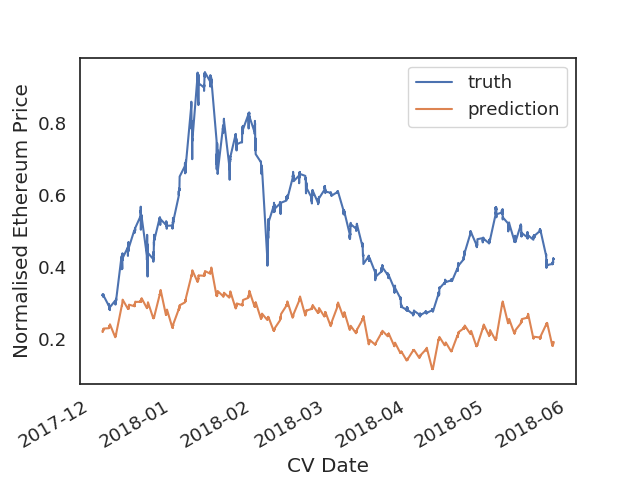

Text(0,0.5,'Normalised Ethereum Price')

In [340]:
import seaborn as sns

cv_time = output_times[test_size:validation_size,:].flatten()

validation_predictions = p

x = validation_labels.flatten()
y = validation_predictions.flatten()
d = np.column_stack((x,y))

%matplotlib notebook
d = pd.DataFrame(index=cv_time,data=d,columns=["truth","prediction"])
ax = d[["truth"]].plot(kind=("line"),zorder=-1)
ax = d[["prediction"]].plot(kind=("line"),zorder=-5,ax=ax)
ax.set_xlabel("CV Date")
ax.set_ylabel("Normalised Ethereum Price")

## T2 Benchmark

In [341]:
# set sizes

# training percentage
training_p = 0.6

# remove percentage change from the features to avoid model cheating in the form of shifting 
X_temp = X[:,:,eth_per_indices]

# find splits
training_size = int(training_p* X_temp.shape[0])
remaining_size = X_temp.shape[0] - training_size
test_size = int(remaining_size/2) + training_size
validation_size = int(remaining_size/2) + test_size


#split training validation
training_features = X_temp[:training_size,:]
training_labels = Y_eth_per[:training_size,:]

# test set
test_features = X_temp[training_size:test_size,:]
test_labels = Y_eth_per[training_size:test_size,:]

# validation set
validation_features = X_temp[test_size:validation_size,:]
validation_labels = Y_eth_per[test_size:validation_size,:]


In [342]:
train_flat = training_features.copy().reshape(training_features.shape[0],-1)
cv_flat = validation_features.copy().reshape(validation_features.shape[0],-1)

In [343]:
from sklearn.linear_model import LinearRegression

In [344]:
lr = LinearRegression()

In [345]:
m = lr.fit(X=train_flat,
y=training_labels,
)

In [346]:
p = m.predict(cv_flat)

In [347]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_true=validation_labels,y_pred=p)
print("mse:",mse)

mse: 9.006450068908492e-05


<IPython.core.display.Javascript object>


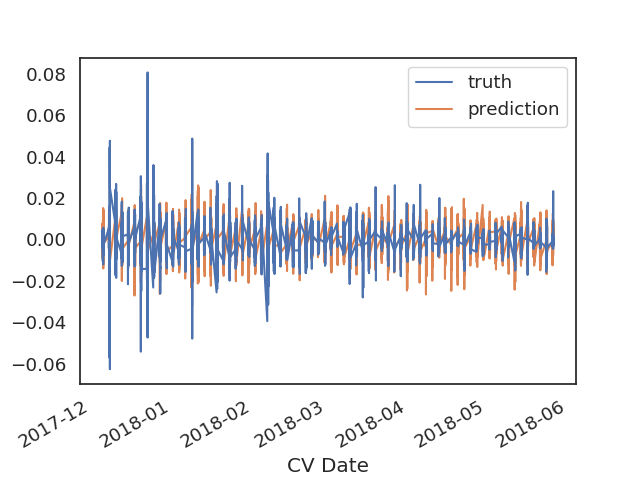

Text(0,0.5,'Normalised Ethereum Price')

In [348]:
import seaborn as sns

cv_time = output_times[test_size:validation_size,:].flatten()

validation_predictions = p

x = validation_labels.flatten()
y = validation_predictions.flatten()
d = np.column_stack((x,y))

%matplotlib notebook
d = pd.DataFrame(index=cv_time,data=d,columns=["truth","prediction"])
ax = d[["truth"]].plot(kind=("line"),zorder=-1)
ax = d[["prediction"]].plot(kind=("line"),zorder=-5,ax=ax)
ax.set_xlabel("CV Date")
ax.set_ylabel("Normalised Ethereum Price")

## T3 Benchmark

In [349]:
# True -> 1 hour later it was more 
# False -> 1 hour later it was less
Y_up = Y_eth[:,0]-Y_eth[:,-1] < 0

In [350]:
# set sizes

# training percentage
training_p = 0.6

# remove percentage change from the features to avoid model cheating in the form of shifting 
X_temp = X[:,:,eth_ud_indices]

training_size = int(training_p* X_temp.shape[0])
remaining_size = X_temp.shape[0] - training_size
test_size = int(remaining_size/2) + training_size
validation_size = int(remaining_size/2) + test_size


#split training validation
training_features = X_temp[:training_size,:]
training_labels = Y_up[:training_size]

# test set
test_features = X_temp[training_size:test_size,:]
test_labels = Y_up[training_size:test_size]

# validation set
validation_features = X_temp[test_size:validation_size,:]
validation_labels = Y_up[test_size:validation_size]


In [351]:
train_flat = training_features.copy().reshape(training_features.shape[0],-1)
cv_flat = validation_features.copy().reshape(validation_features.shape[0],-1)

In [352]:
from sklearn.linear_model import LogisticRegression

In [353]:
lr = LogisticRegression()

In [354]:
m = lr.fit(X=train_flat,
y=training_labels,
)

In [355]:
p = m.predict(cv_flat)

In [356]:
from sklearn.metrics import f1_score

In [357]:
f1 = f1_score(y_true=validation_labels,
              y_pred=p)

print("f1 score:",f1)

f1 score: 0.6666666666666666


# Build CNN

Several different architectures were looked at and compared to one another

In [32]:
#build model
from keras import Sequential
from keras.layers import Conv1D, Conv2D, Dropout, Dense, Flatten, Reshape, LeakyReLU, Softmax

In [33]:
# this is refers to the number of time points per training window we are predicting for
# i.e. for a time point of 10min, 6 equals 60min -> predicting 60min in the future
regresion_output_size = NFS
print("predicting",str(NFS*10),"into the future")

predicting 60 into the future


In [34]:
from keras.callbacks import ModelCheckpoint  

def create_checkpoint(model_name,use):
    d = 'model_weights/cnn{}.{}.weights.hdf5'.format(model_name,use)
    print("directory:",d)
    checkpointer = ModelCheckpoint(filepath=d, 
                               verbose=0, save_best_only=True)

    return checkpointer




In [35]:
def train_model(model,checkpoint,train_feat,train_l,test_feat,test_l):
    trained_model = model.fit(train_feat, 
                            train_l,
                            verbose=0, 
                            batch_size=batch_size,
                            validation_data=(test_feat,
                                           test_l), 
                            epochs = epochs,
                            callbacks=[checkpoint]
                         )

    return trained_model

### Group 1

In [36]:
def compile_model_G1_M0(binary=False):
    model0 = Sequential()

    model0.add(Conv1D(activation='relu', 
                     input_shape=(step_size, 
                                nb_features), 
                     strides=2, 
                     filters=8, 
                     kernel_size=8))

    model0.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=16, 
                     kernel_size=2))


    model0.add(Flatten())
    
    
    if binary==True:
        model0.add(Dense(1))
        model0.add(Softmax())
        model0.compile(loss='binary_crossentropy', optimizer='SGD')
    else:
        model0.add(Dense(regresion_output_size))
        model0.compile(loss='mse', optimizer='adam',metrics=['mape','acc'])
    
    return model0

In [37]:
def compile_model_G1_M1(binary=False): 
    model1 = Sequential()

    model1.add(Conv1D(activation='relu', 
                     input_shape=(step_size, 
                                nb_features), 
                     strides=2, 
                     filters=8, 
                     kernel_size=8))

    model1.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=16, 
                     kernel_size=2))

    model1.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=32, 
                     kernel_size=2))


    model1.add(Flatten())
    

    if binary==True:
        model1.add(Dense(1))
        model1.add(Softmax())
        model1.compile(loss='binary_crossentropy', optimizer='SGD')
    else:
        model1.add(Dense(regresion_output_size))
        model1.compile(loss='mse', optimizer='adam',metrics=['mape','acc'])
    
    return model1

In [38]:
def compile_model_G1_M2(binary=False): 
    model2 = Sequential()

    model2.add(Conv1D(activation='relu', 
                     input_shape=(step_size, 
                                nb_features), 
                     strides=2, 
                     filters=8, 
                     kernel_size=8))

    model2.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=16, 
                     kernel_size=2))

    model2.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=32, 
                     kernel_size=2))

    model2.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=64, 
                     kernel_size=2))
    #model.add(Dropout(0.1))

    model2.add(Flatten())
    
    
    if binary==True:
        model2.add(Dense(1))
        model2.add(Softmax())
        model2.compile(loss='binary_crossentropy', optimizer='SGD')
    else:    
        model2.add(Dense(regresion_output_size))
        model2.compile(loss='mse', optimizer='adam',metrics=['mape','acc'])
    
    return model2

In [39]:
def compile_model_G1_M3(binary=False):
    model3 = Sequential()

    model3.add(Conv1D(activation='relu', 
                     input_shape=(step_size, 
                                nb_features), 
                     strides=2, 
                     filters=8, 
                     kernel_size=8))

    model3.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=16, 
                     kernel_size=2))

    model3.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=32, 
                     kernel_size=2))

    model3.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=64, 
                     kernel_size=2))

    model3.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=128, 
                     kernel_size=2))


    model3.add(Flatten())
    
    if binary==True:
        model3.add(Dense(1))
        model3.add(Softmax())
        model3.compile(loss='binary_crossentropy', optimizer='SGD')
    else:
        model3.add(Dense(regresion_output_size))
        model3.compile(loss='mse', optimizer='adam',metrics=['mape','acc'])
    
    return model3

### Group 2

In [40]:
def compile_model_G2_M0(binary=False):
    model0 = Sequential()

    model0.add(Conv1D(activation='relu', 
                     input_shape=(step_size, 
                                nb_features), 
                     strides=2, 
                     filters=8, 
                     kernel_size=8))

    model0.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=16, 
                     kernel_size=2))


    model0.add(Flatten())
    model0.add(Dropout(0.01))
   
    if binary==True:
        model0.add(Dense(1))
        model0.add(Softmax())
        model0.compile(loss='binary_crossentropy', optimizer='SGD')
    else:
        model0.add(Dense(regresion_output_size))
        model0.compile(loss='mse', optimizer='adam',metrics=['mape','acc'])
    
    return model0

In [41]:
def compile_model_G2_M1(binary=False): 
    model1 = Sequential()

    model1.add(Conv1D(activation='relu', 
                     input_shape=(step_size, 
                                nb_features), 
                     strides=2, 
                     filters=8, 
                     kernel_size=8))

    model1.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=16, 
                     kernel_size=2))

    model1.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=32, 
                     kernel_size=2))


    model1.add(Flatten())
    model1.add(Dropout(0.01))
   
    if binary==True:
        model1.add(Dense(1))
        model1.add(Softmax())
        model1.compile(loss='binary_crossentropy', optimizer='SGD')
    else:
        model1.add(Dense(regresion_output_size))
        model1.compile(loss='mse', optimizer='adam',metrics=['mape','acc'])
    
    return model1

In [42]:
def compile_model_G2_M2(binary=False): 
    model2 = Sequential()

    model2.add(Conv1D(activation='relu', 
                     input_shape=(step_size, 
                                nb_features), 
                     strides=2, 
                     filters=8, 
                     kernel_size=8))

    model2.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=16, 
                     kernel_size=2))

    model2.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=32, 
                     kernel_size=2))

    model2.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=64, 
                     kernel_size=2))

    model2.add(Flatten())
    model2.add(Dropout(0.01))
    
    
    if binary==True:
        model2.add(Dense(1))
        model2.add(Softmax())
        model2.compile(loss='binary_crossentropy', optimizer='SGD')
    else:    
        model2.add(Dense(regresion_output_size))
        model2.compile(loss='mse', optimizer='adam',metrics=['mape','acc'])
    
    return model2

In [43]:
def compile_model_G2_M3(binary=False):
    model3 = Sequential()

    model3.add(Conv1D(activation='relu', 
                     input_shape=(step_size, 
                                nb_features), 
                     strides=2, 
                     filters=8, 
                     kernel_size=8))
    
    model3.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=16, 
                     kernel_size=2))

    model3.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=32, 
                     kernel_size=2))

    model3.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=64, 
                     kernel_size=2))

    model3.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=128, 
                     kernel_size=2))


    model3.add(Flatten())
    model3.add(Dropout(0.01))

    
    if binary==True:
        model3.add(Dense(1))
        model3.add(Softmax())
        model3.compile(loss='binary_crossentropy', optimizer='SGD')
    else:
        model3.add(Dense(regresion_output_size))
        model3.compile(loss='mse', optimizer='adam',metrics=['mape','acc'])
    
    return model3

### Group 3

In [44]:
def compile_model_G3_M0(binary=False):
    model6 = Sequential()

    model6.add(Conv1D(activation='relu', 
                     input_shape=(step_size, 
                                nb_features), 
                     strides=2, 
                     filters=8, 
                     kernel_size=8))

    model6.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=16, 
                     kernel_size=2))


    model6.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=16, 
                     kernel_size=2))

    model6.add(Flatten())
    
    
    if binary==True:
        model6.add(Dense(1))
        model6.add(Softmax())
        model6.compile(loss='binary_crossentropy', optimizer='SGD')
    else:    
        model6.add(Dense(regresion_output_size))
        model6.compile(loss='mse', optimizer='adam',metrics=['mape','acc'])
    
    return model6

In [45]:
def compile_model_G3_M1(binary=False):
    model6 = Sequential()

    model6.add(Conv1D(activation='relu', 
                     input_shape=(step_size, 
                                nb_features), 
                     strides=2, 
                     filters=8, 
                     kernel_size=8))

    model6.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=16, 
                     kernel_size=2))


    model6.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=32, 
                     kernel_size=2))

    model6.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=32, 
                     kernel_size=2))


    model6.add(Flatten())
    
    
    if binary==True:
        model6.add(Dense(1))
        model6.add(Softmax())
        model6.compile(loss='binary_crossentropy', optimizer='SGD')
    else:    
        model6.add(Dense(regresion_output_size))
        model6.compile(loss='mse', optimizer='adam',metrics=['mape','acc'])
    
    return model6

In [46]:
def compile_model_G3_M2(binary=False):
    model7 = Sequential()

    model7.add(Conv1D(activation='relu', 
                     input_shape=(step_size, 
                                nb_features), 
                     strides=2, 
                     filters=6, 
                     kernel_size=2))

    model7.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=6, 
                     kernel_size=2))

    model7.add(Flatten())
    model7.add(Dense(48))
    model7.add(Dropout(0.01))
    model7.add(Dense(24))
    model7.add(Dropout(0.01))
    model7.add(Dense(12))
    
    
    if binary==True:
        model7.add(Dense(1))
        model7.add(Softmax())
        model7.compile(loss='binary_crossentropy', optimizer='SGD')
    else:    
        model7.add(Dense(regresion_output_size))
        model7.compile(loss='mse', optimizer='adam',metrics=['mape','acc'])
    
    return model7

### Group 4

In [47]:
def compile_model_G4_M0(binary=False):
    model0 = Sequential()

    model0.add(Conv1D( 
                     input_shape=(step_size, 
                                nb_features), 
                     strides=2, 
                     filters=8, 
                     kernel_size=8))

    model0.add(LeakyReLU(alpha=0.1))

    
    model0.add(Conv1D( 
                     strides=2, 
                     filters=16, 
                     kernel_size=2))

    model0.add(LeakyReLU(alpha=0.1))


    model0.add(Flatten())
    
    
    if binary==True:
        model0.add(Dense(1))
        model0.add(Softmax())
        model0.compile(loss='binary_crossentropy', optimizer='SGD')
    else:
        model0.add(Dense(regresion_output_size))
        model0.compile(loss='mse', optimizer='adam',metrics=['mape','acc'])
    
    return model0

In [48]:
def compile_model_G4_M1(binary=False): 
    model1 = Sequential()

    model1.add(Conv1D( 
                     input_shape=(step_size, 
                                nb_features), 
                     strides=2, 
                     filters=8, 
                     kernel_size=8))

    model1.add(LeakyReLU(alpha=0.1))

    model1.add(Conv1D(
                     strides=2, 
                     filters=16, 
                     kernel_size=2))

    model1.add(LeakyReLU(alpha=0.1))

    model1.add(Conv1D(
                     strides=2, 
                     filters=32, 
                     kernel_size=2))


    model1.add(LeakyReLU(alpha=0.1))

    model1.add(Flatten())
    

    if binary==True:
        model1.add(Dense(1))
        model1.add(Softmax())
        model1.compile(loss='binary_crossentropy', optimizer='SGD')
    else:
        model1.add(Dense(regresion_output_size))
        model1.compile(loss='mse', optimizer='adam',metrics=['mape','acc'])
    
    return model1

In [49]:
def compile_model_G4_M2(binary=False): 
    model2 = Sequential()

    model2.add(Conv1D( 
                     input_shape=(step_size, 
                                nb_features), 
                     strides=2, 
                     filters=8, 
                     kernel_size=8))

    model2.add(LeakyReLU(alpha=0.1))


    model2.add(Conv1D(
                     strides=2, 
                     filters=16, 
                     kernel_size=2))

    model2.add(LeakyReLU(alpha=0.1))

    model2.add(Conv1D( 
                     strides=2, 
                     filters=32, 
                     kernel_size=2))

    model2.add(LeakyReLU(alpha=0.1))

    
    model2.add(Conv1D(
                     strides=2, 
                     filters=64, 
                     kernel_size=2))

    model2.add(LeakyReLU(alpha=0.1))


    model2.add(Flatten())
    
    
    if binary==True:
        model2.add(Dense(1))
        model2.add(Softmax())
        model2.compile(loss='binary_crossentropy', optimizer='SGD')
    else:    
        model2.add(Dense(regresion_output_size))
        model2.compile(loss='mse', optimizer='adam',metrics=['mape','acc'])
    
    return model2

In [50]:
def compile_model_G4_M3(binary=False):
    model3 = Sequential()

    model3.add(Conv1D(activation='relu', 
                     input_shape=(step_size, 
                                nb_features), 
                     strides=2, 
                     filters=8, 
                     kernel_size=8))

    model3.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=16, 
                     kernel_size=2))

    model3.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=32, 
                     kernel_size=2))

    model3.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=64, 
                     kernel_size=2))

    model3.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=128, 
                     kernel_size=2))


    model3.add(Flatten())
    
    if binary==True:
        model3.add(Dense(1))
        model3.add(Softmax())
        model3.compile(loss='binary_crossentropy', optimizer='SGD')
    else:
        model3.add(Dense(regresion_output_size))
        model3.compile(loss='mse', optimizer='adam',metrics=['mape','acc'])
    
    return model3

In [51]:
def compile_model_G4_M4(binary=False):
    model9 = Sequential()

    model9.add(Conv1D( 
                     input_shape=(step_size, 
                                nb_features), 
                     filters=1, 
                     kernel_size=1))

    model9.add(Flatten())
    
    if binary==True:
        model9.add(Dense(1))
        model9.add(Softmax())
        model9.compile(loss='binary_crossentropy', optimizer='SGD')
    else:
        model9.add(Dense(regresion_output_size))
        model9.compile(loss='mse', optimizer='adam',metrics=['mape','acc'])
    
    return model9

## T1: Predict Price

In [52]:
# set sizes

# training percentage
training_p = 0.6

X_temp = X[:,:,:]

training_size = int(training_p* X_temp.shape[0])
remaining_size = X_temp.shape[0] - training_size
test_size = int(remaining_size/2) + training_size
validation_size = int(remaining_size/2) + test_size


#split training validation
training_features = X_temp[:training_size,:]
training_labels = Y_eth[:training_size,:]

# test set
test_features = X_temp[training_size:test_size,:]
test_labels = Y_eth[training_size:test_size,:]

# validation set
validation_features = X_temp[test_size:validation_size,:]
validation_labels = Y_eth[test_size:validation_size,:]


In [53]:
epochs = 100
deep_epochs = 200
step_size = X_temp.shape[1]
batch_size= 8
nb_features = X_temp.shape[2]

### Train

**Temporal Golden Rule 2:**
* Temporal Training Order: It can not train and predict on future data and then train and predict on past data.

In [54]:
checkpointer_G1_M0 = create_checkpoint("G1M0","price")
checkpointer_G1_M1 = create_checkpoint("G1M1","price")
checkpointer_G1_M2 = create_checkpoint("G1M2","price")
checkpointer_G1_M3 = create_checkpoint("G1M3","price")

checkpointer_G2_M0 = create_checkpoint("G2M0","price")
checkpointer_G2_M1 = create_checkpoint("G2M1","price")
checkpointer_G2_M2 = create_checkpoint("G2M2","price")
checkpointer_G2_M3 = create_checkpoint("G2M3","price")

checkpointer_G3_M0 = create_checkpoint("G3M0","price")
checkpointer_G3_M1 = create_checkpoint("G3M1","price")
checkpointer_G3_M2 = create_checkpoint("G3M2","price")


checkpointer_G4_M0 = create_checkpoint("G4M0","price")
checkpointer_G4_M1 = create_checkpoint("G4M1","price")
checkpointer_G4_M2 = create_checkpoint("G4M2","price")
checkpointer_G4_M3 = create_checkpoint("G4M3","price")
checkpointer_G4_M4 = create_checkpoint("G4M4","price")

directory: model_weights/cnnG1M0.price.weights.hdf5
directory: model_weights/cnnG1M1.price.weights.hdf5
directory: model_weights/cnnG1M2.price.weights.hdf5
directory: model_weights/cnnG1M3.price.weights.hdf5
directory: model_weights/cnnG2M0.price.weights.hdf5
directory: model_weights/cnnG2M1.price.weights.hdf5
directory: model_weights/cnnG2M2.price.weights.hdf5
directory: model_weights/cnnG2M3.price.weights.hdf5
directory: model_weights/cnnG3M0.price.weights.hdf5
directory: model_weights/cnnG3M1.price.weights.hdf5
directory: model_weights/cnnG3M2.price.weights.hdf5
directory: model_weights/cnnG4M0.price.weights.hdf5
directory: model_weights/cnnG4M1.price.weights.hdf5
directory: model_weights/cnnG4M2.price.weights.hdf5
directory: model_weights/cnnG4M3.price.weights.hdf5
directory: model_weights/cnnG4M4.price.weights.hdf5


In [55]:
model_G1_M0 = compile_model_G1_M0()
model_G1_M1 = compile_model_G1_M1() 
model_G1_M2 = compile_model_G1_M2()
model_G1_M3 = compile_model_G1_M3()

model_G2_M0 = compile_model_G2_M0()
model_G2_M1 = compile_model_G2_M1()
model_G2_M2 = compile_model_G2_M2()
model_G2_M3 = compile_model_G2_M3()

model_G3_M0 = compile_model_G3_M0()
model_G3_M1 = compile_model_G3_M1()
model_G3_M2 = compile_model_G3_M2()


model_G4_M0 = compile_model_G4_M0()
model_G4_M1 = compile_model_G4_M1()
model_G4_M2 = compile_model_G4_M2()
model_G4_M3 = compile_model_G4_M3()
model_G4_M4 = compile_model_G4_M4()

In [56]:
X_train = training_features
Y_train = training_labels
X_test = test_features
Y_test = test_labels

trained_model_G1_M0 = train_model(model_G1_M0,checkpointer_G1_M0,X_train,Y_train,X_test,Y_test)
print("done G1M0")
trained_model_G1_M1 = train_model(model_G1_M1,checkpointer_G1_M1,X_train,Y_train,X_test,Y_test)
print("done G1M1")
trained_model_G1_M2 = train_model(model_G1_M2,checkpointer_G1_M2,X_train,Y_train,X_test,Y_test)
print("done G1M2")
trained_model_G1_M3 = train_model(model_G1_M3,checkpointer_G1_M3,X_train,Y_train,X_test,Y_test)
print("done G1M3")


trained_model_G2_M0 = train_model(model_G2_M0,checkpointer_G2_M0,X_train,Y_train,X_test,Y_test)
print("done G2M0")
trained_model_G2_M1 = train_model(model_G2_M1,checkpointer_G2_M1,X_train,Y_train,X_test,Y_test)
print("done G2M1")
trained_model_G2_M2 = train_model(model_G2_M2,checkpointer_G2_M2,X_train,Y_train,X_test,Y_test)
print("done G2M2")
trained_model_G2_M3 = train_model(model_G2_M3,checkpointer_G2_M3,X_train,Y_train,X_test,Y_test)
print("done G2M3")


trained_model_G3_M0 = train_model(model_G3_M0,checkpointer_G3_M0,X_train,Y_train,X_test,Y_test)
print("done G3M0")
trained_model_G3_M1 = train_model(model_G3_M1,checkpointer_G3_M1,X_train,Y_train,X_test,Y_test)
print("done G3M1")
trained_model_G3_M2 = train_model(model_G3_M2,checkpointer_G3_M2,X_train,Y_train,X_test,Y_test)
print("done G3M2")

trained_model_G4_M0 = train_model(model_G4_M0,checkpointer_G4_M0,X_train,Y_train,X_test,Y_test)
print("done G4M0")
trained_model_G4_M1 = train_model(model_G4_M1,checkpointer_G4_M1,X_train,Y_train,X_test,Y_test)
print("done G4M1")
trained_model_G4_M2 = train_model(model_G4_M2,checkpointer_G4_M2,X_train,Y_train,X_test,Y_test)
print("done G4M2")
trained_model_G4_M3 = train_model(model_G4_M3,checkpointer_G4_M3,X_train,Y_train,X_test,Y_test)
print("done G4M3")
trained_model_G4_M4 = train_model(model_G4_M4,checkpointer_G4_M4,X_train,Y_train,X_test,Y_test)
print("done G4M4")



done G1M0
done G1M1
done G1M2
done G1M3
done G2M0
done G2M1
done G2M2
done G2M3
done G3M0
done G3M1
done G3M2
done G4M0
done G4M1
done G4M2
done G4M3
done G4M4


### Results

In [57]:
# make sure to reload the data at the begingin of section 9.1
trained_model_G1_M0= compile_model_G1_M0()
trained_model_G1_M1= compile_model_G1_M1()
trained_model_G1_M2= compile_model_G1_M2()
trained_model_G1_M3= compile_model_G1_M3()
trained_model_G2_M0= compile_model_G2_M0()
trained_model_G2_M1= compile_model_G2_M1()
trained_model_G2_M2= compile_model_G2_M2()
trained_model_G2_M3= compile_model_G2_M3()
trained_model_G3_M0= compile_model_G3_M0()
trained_model_G3_M1= compile_model_G3_M1()
trained_model_G3_M2= compile_model_G3_M2()
trained_model_G4_M0= compile_model_G4_M0()
trained_model_G4_M1= compile_model_G4_M1()
trained_model_G4_M2= compile_model_G4_M2()
trained_model_G4_M3= compile_model_G4_M3()
trained_model_G4_M4= compile_model_G4_M4()

trained_model_G1_M0.load_weights('model_weights/cnnG1M0.price.weights.hdf5')
trained_model_G1_M1.load_weights('model_weights/cnnG1M1.price.weights.hdf5')
trained_model_G1_M2.load_weights('model_weights/cnnG1M2.price.weights.hdf5')
trained_model_G1_M3.load_weights('model_weights/cnnG1M3.price.weights.hdf5')

trained_model_G2_M0.load_weights('model_weights/cnnG2M0.price.weights.hdf5')
trained_model_G2_M1.load_weights('model_weights/cnnG2M1.price.weights.hdf5')
trained_model_G2_M2.load_weights('model_weights/cnnG2M2.price.weights.hdf5')
trained_model_G2_M3.load_weights('model_weights/cnnG2M3.price.weights.hdf5')

trained_model_G3_M0.load_weights('model_weights/cnnG3M0.price.weights.hdf5')
trained_model_G3_M1.load_weights('model_weights/cnnG3M1.price.weights.hdf5')
trained_model_G3_M2.load_weights('model_weights/cnnG3M2.price.weights.hdf5')


trained_model_G4_M0.load_weights('model_weights/cnnG4M0.price.weights.hdf5')
trained_model_G4_M1.load_weights('model_weights/cnnG4M1.price.weights.hdf5')
trained_model_G4_M2.load_weights('model_weights/cnnG4M2.price.weights.hdf5')
trained_model_G4_M3.load_weights('model_weights/cnnG4M3.price.weights.hdf5')
trained_model_G4_M4.load_weights('model_weights/cnnG4M4.price.weights.hdf5')

In [58]:
import pandas as pd
df = pd.DataFrame(columns=["model","number of convolution layers","filters at each layer","activation function",
                           "number of dense layers","number of paramaters","drop out","mse test score",
                           "mse cv score"])


t_G1_M0 = trained_model_G1_M0.model.evaluate(test_features, test_labels, verbose=0)
t_G1_M1 = trained_model_G1_M1.model.evaluate(test_features, test_labels, verbose=0)
t_G1_M2 = trained_model_G1_M2.model.evaluate(test_features, test_labels, verbose=0)
t_G1_M3 = trained_model_G1_M3.model.evaluate(test_features, test_labels, verbose=0)

t_G2_M0 = trained_model_G2_M0.model.evaluate(test_features, test_labels, verbose=0)
t_G2_M1 = trained_model_G2_M1.model.evaluate(test_features, test_labels, verbose=0)
t_G2_M2 = trained_model_G2_M2.model.evaluate(test_features, test_labels, verbose=0)
t_G2_M3 = trained_model_G2_M3.model.evaluate(test_features, test_labels, verbose=0)

t_G3_M0 = trained_model_G3_M0.model.evaluate(test_features, test_labels, verbose=0)
t_G3_M1 = trained_model_G3_M1.model.evaluate(test_features, test_labels, verbose=0)
t_G3_M2 = trained_model_G3_M2.model.evaluate(test_features, test_labels, verbose=0)


t_G4_M0 = trained_model_G4_M0.model.evaluate(test_features, test_labels, verbose=0)
t_G4_M1 = trained_model_G4_M1.model.evaluate(test_features, test_labels, verbose=0)
t_G4_M2 = trained_model_G4_M2.model.evaluate(test_features, test_labels, verbose=0)
t_G4_M3 = trained_model_G4_M3.model.evaluate(test_features, test_labels, verbose=0)
t_G4_M4 = trained_model_G4_M4.model.evaluate(test_features, test_labels, verbose=0)


cv_G1_M0 = trained_model_G1_M0.model.evaluate(validation_features, validation_labels, verbose=0)
cv_G1_M1 = trained_model_G1_M1.model.evaluate(validation_features, validation_labels, verbose=0)
cv_G1_M2 = trained_model_G1_M2.model.evaluate(validation_features, validation_labels, verbose=0)
cv_G1_M3 = trained_model_G1_M3.model.evaluate(validation_features, validation_labels, verbose=0)

cv_G2_M0 = trained_model_G2_M0.model.evaluate(validation_features, validation_labels, verbose=0)
cv_G2_M1 = trained_model_G2_M1.model.evaluate(validation_features, validation_labels, verbose=0)
cv_G2_M2 = trained_model_G2_M2.model.evaluate(validation_features, validation_labels, verbose=0)
cv_G2_M3 = trained_model_G2_M3.model.evaluate(validation_features, validation_labels, verbose=0)

cv_G3_M0 = trained_model_G3_M0.model.evaluate(validation_features, validation_labels, verbose=0)
cv_G3_M1 = trained_model_G3_M1.model.evaluate(validation_features, validation_labels, verbose=0)
cv_G3_M2 = trained_model_G3_M2.model.evaluate(validation_features, validation_labels, verbose=0)


cv_G4_M0 = trained_model_G4_M0.model.evaluate(validation_features, validation_labels, verbose=0)
cv_G4_M1 = trained_model_G4_M1.model.evaluate(validation_features, validation_labels, verbose=0)
cv_G4_M2 = trained_model_G4_M2.model.evaluate(validation_features, validation_labels, verbose=0)
cv_G4_M3 = trained_model_G4_M3.model.evaluate(validation_features, validation_labels, verbose=0)
cv_G4_M4 = trained_model_G4_M4.model.evaluate(validation_features, validation_labels, verbose=0)


G1_M0_param = trained_model_G1_M0.model.count_params()
G1_M1_param = trained_model_G1_M1.model.count_params()
G1_M2_param = trained_model_G1_M2.model.count_params()
G1_M3_param = trained_model_G1_M3.model.count_params()
G2_M0_param = trained_model_G2_M0.model.count_params()
G2_M1_param = trained_model_G2_M1.model.count_params()
G2_M2_param = trained_model_G2_M2.model.count_params()
G2_M3_param = trained_model_G2_M3.model.count_params()
G3_M0_param = trained_model_G3_M0.model.count_params()
G3_M1_param = trained_model_G3_M1.model.count_params()
G3_M2_param = trained_model_G3_M2.model.count_params()
G4_M0_param = trained_model_G4_M0.model.count_params()
G4_M1_param = trained_model_G4_M1.model.count_params()
G4_M2_param = trained_model_G4_M2.model.count_params()
G4_M3_param = trained_model_G4_M3.model.count_params()
G4_M4_param = trained_model_G4_M4.model.count_params()



cv = [cv_G1_M0,cv_G1_M1,cv_G1_M2,cv_G1_M3,
      cv_G1_M0,cv_G2_M1,cv_G2_M2,cv_G2_M3,
      cv_G3_M0,cv_G3_M1,cv_G3_M2,
      cv_G4_M0,cv_G4_M1,cv_G4_M2,cv_G4_M3,cv_G4_M4]

ts = [t_G1_M0,t_G1_M1,t_G1_M2,t_G1_M3,
      t_G2_M0,t_G2_M1,t_G2_M2,t_G2_M3,
      t_G3_M0,t_G3_M1,t_G3_M2,
      t_G4_M0,t_G4_M1,t_G4_M2,t_G4_M3,t_G4_M3,t_G4_M4
     ]

cv_name = ["CNN:G1M0","CNN:G1M1","CNN:G1M2","CNN:G1M3",
           "CNN:G2M0","CNN:G2M1","CNN:G2M2","CNN:G2M3",
           "CNN:G3M0","CNN:G3M1","CNN:G3M2",
           "CNN:G4M0","CNN:G4M1","CNN:G4M2","CNN:G4M3","CNN:G4M4"]

layers = ["2","3","4","5",
          "2","3","4","5",
          "3","4","2",
         "2","3","4","5","1"]

drop_out = ["false","false","false","false",
            "true","true","true","true",
            "false","false","false",
            "false","false","false","false","false"]

filter_sizing = ["8,16","8,16,32","8,16,32,64","8,16,32,64,128",
                 "8,16","8,16,32","8,16,32,64","8,16,32,64,128",
                 "8,16,16","8,16,32,32","6,6",
                 "8,16","8,16,32","8,16,32,64","8,16,32,64,128","1"]

no_dense = ["1","1","1","1",
            "1","1","1","1",
            "1","1","4",
           "1","1","1","1","1"]

paramaters = [G1_M0_param,G1_M1_param,G1_M2_param,G1_M3_param,
G2_M0_param,G2_M1_param,G2_M2_param,G2_M3_param,
G3_M0_param,G3_M1_param,G3_M2_param,
G4_M0_param,G4_M1_param,G4_M2_param,G4_M3_param,G4_M4_param]

activation = ["relu","relu","relu","relu",
              "relu","relu","relu","relu",
              "relu","relu","relu",
              "leakyrelu","leakyrelu","leakyrelu","leakyrelu","linear"]


row = zip(cv,ts,cv_name,layers,drop_out,filter_sizing,no_dense,paramaters,activation)

for cv_scores,test_score,model_name,layers,drop_out,filter_sizing,no_dense,paramaters,activation_function in row :
    #metric_scores
    
    df = df.append({
         "model":model_name,
        "number of convolution layers":layers,
        "drop out":drop_out,
        "mse test score":test_score[0],
        "mse cv score":cv_scores[0],
        "filters at each layer":filter_sizing,
        "number of dense layers":no_dense,
        "number of paramaters":paramaters,
        "activation function":activation_function
          }, ignore_index=True)

    
df

/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/keras/engine/sequential.py:109: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


,model,number of convolution layers,filters at each layer,activation function,number of dense layers,number of paramaters,drop out,mse test score,mse cv score
0,CNN:G1M0,2,"8,16",relu,1,7518,false,0.003666,0.038055
1,CNN:G1M1,3,"8,16,32",relu,1,8574,false,0.005730,0.046802
2,CNN:G1M2,4,"8,16,32,64",relu,1,12542,false,0.002755,0.008862
3,CNN:G1M3,5,"8,16,32,64,128",relu,1,28670,false,0.002090,0.007661
4,CNN:G2M0,2,"8,16",relu,1,7518,true,0.005603,0.038055
5,CNN:G2M1,3,"8,16,32",relu,1,8574,true,0.003350,0.014266
6,CNN:G2M2,4,"8,16,32,64",relu,1,12542,true,0.006318,0.039246
7,CNN:G2M3,5,"8,16,32,64,128",relu,1,28670,true,0.000773,0.012689
8,CNN:G3M0,3,"8,16,16",relu,1,4686,false,0.003345,0.008617
9,CNN:G3M1,4,"8,16,32,32",relu,1,7198,false,0.001734,0.005835


**This is looking at the plot of test data used for CV in the training step**

/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/keras/engine/sequential.py:109: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


<IPython.core.display.Javascript object>


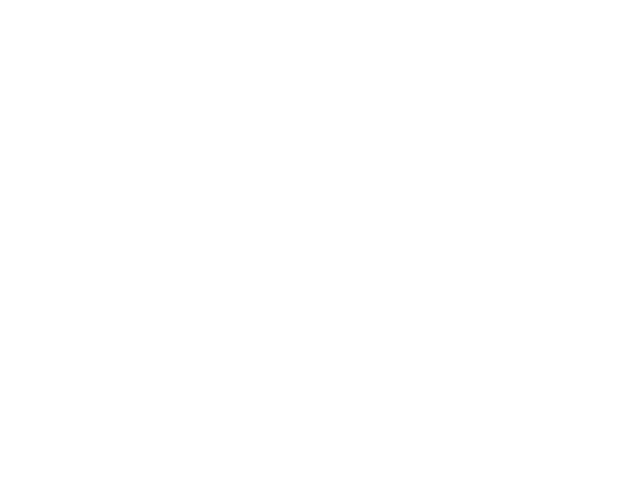

In [59]:
r = trained_model_G1_M3.model.predict(test_features)

x = test_labels.flatten()
y = r.flatten()
d = np.column_stack((x,y))
%matplotlib notebook
cv_time = output_times[training_size:test_size,:].flatten()
pd.DataFrame(index=cv_time,data=d).plot(kind=("line"))

**This is looking at the holdout CV prediction on a model**

/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/keras/engine/sequential.py:109: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


<IPython.core.display.Javascript object>


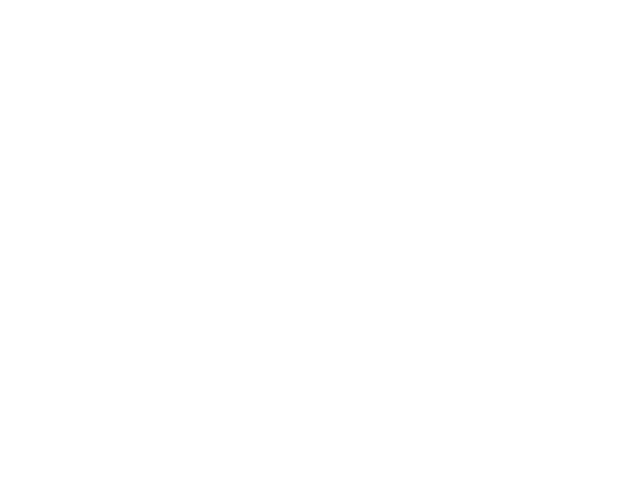

Text(0,0.5,'Normalised Ethereum Price')

In [60]:
import seaborn as sns

cv_time = output_times[test_size:validation_size,:].flatten()

validation_predictions = trained_model_G3_M0.model.predict(validation_features)

x = validation_labels.flatten()
y = validation_predictions.flatten()
d = np.column_stack((x,y))

%matplotlib notebook
d = pd.DataFrame(index=cv_time,data=d,columns=["truth","prediction"])
ax = d[["truth"]].plot(kind=("line"),zorder=-1)
ax = d[["prediction"]].plot(kind=("line"),zorder=-5,ax=ax)
ax.set_xlabel("CV Date")
ax.set_ylabel("Normalised Ethereum Price")

### Architecture Summary

In [61]:
print("G1_M0")

trained_model_G1_M0.summary()
print("G1_M1")

trained_model_G1_M1.summary()
print("G1_M2")

trained_model_G1_M2.summary()
print("G1_M3")

trained_model_G1_M3.summary()
print("G2_M0")

trained_model_G2_M0.summary()
print("G2_M1")

trained_model_G2_M1.summary()
print("G2_M2")

trained_model_G2_M2.summary()
print("G2_M3")

trained_model_G2_M3.summary()
print("G3_M0")

trained_model_G3_M0.summary()
print("G3_M1")

trained_model_G3_M1.summary()
print("G3_M2")

trained_model_G3_M2.summary()
print("G4_M0")

trained_model_G4_M0.summary()
print("G4_M1")

trained_model_G4_M1.summary()
print("G4_M2")

trained_model_G4_M2.summary()
print("G4_M3")

trained_model_G4_M3.summary()
print("G4_M4")
trained_model_G4_M4.summary()


G1_M0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_53 (Conv1D)           (None, 141, 8)            520       
_________________________________________________________________
conv1d_54 (Conv1D)           (None, 70, 16)            272       
_________________________________________________________________
flatten_17 (Flatten)         (None, 1120)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 6)                 6726      
Total params: 7,518
Trainable params: 7,518
Non-trainable params: 0
_________________________________________________________________
G1_M1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_55 (Conv1D)           (None, 141, 8)            520       
______________________________________________________________

## T2: Predict Percentage Change

In [62]:
# set sizes

# training percentage
training_p = 0.6

# remove percentage change from the features to avoid model cheating in the form of shifting 
X_temp = X[:,:,eth_per_indices]

training_size = int(training_p* X_temp.shape[0])
remaining_size = X_temp.shape[0] - training_size
test_size = int(remaining_size/2) + training_size
validation_size = int(remaining_size/2) + test_size


#split training validation
training_features = X_temp[:training_size,:]
training_labels = Y_eth_per[:training_size,:]

# test set
test_features = X_temp[training_size:test_size,:]
test_labels = Y_eth_per[training_size:test_size,:]

# validation set
validation_features = X_temp[test_size:validation_size,:]
validation_labels = Y_eth_per[test_size:validation_size,:]


In [63]:
epochs = 100
deep_epochs = 200
step_size = X_temp.shape[1]
batch_size= 8
nb_features = X_temp.shape[2]

### Train

**Temporal Golden Rule 2:**
* Temporal Training Order: It can not train and predict on future data and then train and predict on past data.

In [64]:
checkpointer_G1_M0 = create_checkpoint("G1M0","percent")
checkpointer_G1_M1 = create_checkpoint("G1M1","percent")
checkpointer_G1_M2 = create_checkpoint("G1M2","percent")
checkpointer_G1_M3 = create_checkpoint("G1M3","percent")

checkpointer_G2_M0 = create_checkpoint("G2M0","percent")
checkpointer_G2_M1 = create_checkpoint("G2M1","percent")
checkpointer_G2_M2 = create_checkpoint("G2M2","percent")
checkpointer_G2_M3 = create_checkpoint("G2M3","percent")

checkpointer_G3_M0 = create_checkpoint("G3M0","percent")
checkpointer_G3_M1 = create_checkpoint("G3M1","percent")
checkpointer_G3_M2 = create_checkpoint("G3M2","percent")


checkpointer_G4_M0 = create_checkpoint("G4M0","percent")
checkpointer_G4_M1 = create_checkpoint("G4M1","percent")
checkpointer_G4_M2 = create_checkpoint("G4M2","percent")
checkpointer_G4_M3 = create_checkpoint("G4M3","percent")
checkpointer_G4_M4 = create_checkpoint("G4M4","percent")

directory: model_weights/cnnG1M0.percent.weights.hdf5
directory: model_weights/cnnG1M1.percent.weights.hdf5
directory: model_weights/cnnG1M2.percent.weights.hdf5
directory: model_weights/cnnG1M3.percent.weights.hdf5
directory: model_weights/cnnG2M0.percent.weights.hdf5
directory: model_weights/cnnG2M1.percent.weights.hdf5
directory: model_weights/cnnG2M2.percent.weights.hdf5
directory: model_weights/cnnG2M3.percent.weights.hdf5
directory: model_weights/cnnG3M0.percent.weights.hdf5
directory: model_weights/cnnG3M1.percent.weights.hdf5
directory: model_weights/cnnG3M2.percent.weights.hdf5
directory: model_weights/cnnG4M0.percent.weights.hdf5
directory: model_weights/cnnG4M1.percent.weights.hdf5
directory: model_weights/cnnG4M2.percent.weights.hdf5
directory: model_weights/cnnG4M3.percent.weights.hdf5
directory: model_weights/cnnG4M4.percent.weights.hdf5


In [65]:
model_G1_M0 = compile_model_G1_M0()
model_G1_M1 = compile_model_G1_M1() 
model_G1_M2 = compile_model_G1_M2()
model_G1_M3 = compile_model_G1_M3()

model_G2_M0 = compile_model_G2_M0()
model_G2_M1 = compile_model_G2_M1()
model_G2_M2 = compile_model_G2_M2()
model_G2_M3 = compile_model_G2_M3()

model_G3_M0 = compile_model_G3_M0()
model_G3_M1 = compile_model_G3_M1()
model_G3_M2 = compile_model_G3_M2()


model_G4_M0 = compile_model_G4_M0()
model_G4_M1 = compile_model_G4_M1()
model_G4_M2 = compile_model_G4_M2()
model_G4_M3 = compile_model_G4_M3()
model_G4_M4 = compile_model_G4_M4()

In [66]:
X_train = training_features
Y_train = training_labels
X_test = test_features
Y_test = test_labels

trained_model_G1_M0 = train_model(model_G1_M0,checkpointer_G1_M0,X_train,Y_train,X_test,Y_test)
print("done G1M0")
trained_model_G1_M1 = train_model(model_G1_M1,checkpointer_G1_M1,X_train,Y_train,X_test,Y_test)
print("done G1M1")
trained_model_G1_M2 = train_model(model_G1_M2,checkpointer_G1_M2,X_train,Y_train,X_test,Y_test)
print("done G1M2")
trained_model_G1_M3 = train_model(model_G1_M3,checkpointer_G1_M3,X_train,Y_train,X_test,Y_test)
print("done G1M3")


trained_model_G2_M0 = train_model(model_G2_M0,checkpointer_G2_M0,X_train,Y_train,X_test,Y_test)
print("done G2M0")
trained_model_G2_M1 = train_model(model_G2_M1,checkpointer_G2_M1,X_train,Y_train,X_test,Y_test)
print("done G2M1")
trained_model_G2_M2 = train_model(model_G2_M2,checkpointer_G2_M2,X_train,Y_train,X_test,Y_test)
print("done G2M2")
trained_model_G2_M3 = train_model(model_G2_M3,checkpointer_G2_M3,X_train,Y_train,X_test,Y_test)
print("done G2M3")


trained_model_G3_M0 = train_model(model_G3_M0,checkpointer_G3_M0,X_train,Y_train,X_test,Y_test)
print("done G3M0")
trained_model_G3_M1 = train_model(model_G3_M1,checkpointer_G3_M1,X_train,Y_train,X_test,Y_test)
print("done G3M1")
trained_model_G3_M2 = train_model(model_G3_M2,checkpointer_G3_M2,X_train,Y_train,X_test,Y_test)
print("done G3M2")

trained_model_G4_M0 = train_model(model_G4_M0,checkpointer_G4_M0,X_train,Y_train,X_test,Y_test)
print("done G4M0")
trained_model_G4_M1 = train_model(model_G4_M1,checkpointer_G4_M1,X_train,Y_train,X_test,Y_test)
print("done G4M1")
trained_model_G4_M2 = train_model(model_G4_M2,checkpointer_G4_M2,X_train,Y_train,X_test,Y_test)
print("done G4M2")
trained_model_G4_M3 = train_model(model_G4_M3,checkpointer_G4_M3,X_train,Y_train,X_test,Y_test)
print("done G4M3")
trained_model_G4_M4 = train_model(model_G4_M4,checkpointer_G4_M4,X_train,Y_train,X_test,Y_test)
print("done G4M4")



done G1M0
done G1M1
done G1M2
done G1M3
done G2M0
done G2M1
done G2M2
done G2M3
done G3M0
done G3M1
done G3M2
done G4M0
done G4M1
done G4M2
done G4M3
done G4M4


### Results

In [67]:
# make sure to reload the data at the begingin of section 9.1
trained_model_G1_M0= compile_model_G1_M0()
trained_model_G1_M1= compile_model_G1_M1()
trained_model_G1_M2= compile_model_G1_M2()
trained_model_G1_M3= compile_model_G1_M3()
trained_model_G2_M0= compile_model_G2_M0()
trained_model_G2_M1= compile_model_G2_M1()
trained_model_G2_M2= compile_model_G2_M2()
trained_model_G2_M3= compile_model_G2_M3()
trained_model_G3_M0= compile_model_G3_M0()
trained_model_G3_M1= compile_model_G3_M1()
trained_model_G3_M2= compile_model_G3_M2()
trained_model_G4_M0= compile_model_G4_M0()
trained_model_G4_M1= compile_model_G4_M1()
trained_model_G4_M2= compile_model_G4_M2()
trained_model_G4_M3= compile_model_G4_M3()
trained_model_G4_M4= compile_model_G4_M4()

trained_model_G1_M0.model.load_weights('model_weights/cnnG1M0.percent.weights.hdf5')
trained_model_G1_M1.model.load_weights('model_weights/cnnG1M1.percent.weights.hdf5')
trained_model_G1_M2.model.load_weights('model_weights/cnnG1M2.percent.weights.hdf5')
trained_model_G1_M3.model.load_weights('model_weights/cnnG1M3.percent.weights.hdf5')

trained_model_G2_M0.model.load_weights('model_weights/cnnG2M0.percent.weights.hdf5')
trained_model_G2_M1.model.load_weights('model_weights/cnnG2M1.percent.weights.hdf5')
trained_model_G2_M2.model.load_weights('model_weights/cnnG2M2.percent.weights.hdf5')
trained_model_G2_M3.model.load_weights('model_weights/cnnG2M3.percent.weights.hdf5')

trained_model_G3_M0.model.load_weights('model_weights/cnnG3M0.percent.weights.hdf5')
trained_model_G3_M1.model.load_weights('model_weights/cnnG3M1.percent.weights.hdf5')
trained_model_G3_M2.model.load_weights('model_weights/cnnG3M2.percent.weights.hdf5')


trained_model_G4_M0.model.load_weights('model_weights/cnnG4M0.percent.weights.hdf5')
trained_model_G4_M1.model.load_weights('model_weights/cnnG4M1.percent.weights.hdf5')
trained_model_G4_M2.model.load_weights('model_weights/cnnG4M2.percent.weights.hdf5')
trained_model_G4_M3.model.load_weights('model_weights/cnnG4M3.percent.weights.hdf5')
trained_model_G4_M4.model.load_weights('model_weights/cnnG4M4.percent.weights.hdf5')

/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/keras/engine/sequential.py:109: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '
/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/keras/engine/sequential.py:109: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '
/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/keras/engine/sequential.py:109: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '
/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/keras/engine/sequential.py:109: UserWarning: `Sequential.model` i

In [68]:
import pandas as pd
df = pd.DataFrame(columns=["model","number of convolution layers","filters at each layer","activation function",
                           "number of dense layers","number of paramaters","drop out","mse test score",
                           "mse cv score"])


t_G1_M0 = trained_model_G1_M0.model.evaluate(test_features, test_labels, verbose=0)
t_G1_M1 = trained_model_G1_M1.model.evaluate(test_features, test_labels, verbose=0)
t_G1_M2 = trained_model_G1_M2.model.evaluate(test_features, test_labels, verbose=0)
t_G1_M3 = trained_model_G1_M3.model.evaluate(test_features, test_labels, verbose=0)

t_G2_M0 = trained_model_G2_M0.model.evaluate(test_features, test_labels, verbose=0)
t_G2_M1 = trained_model_G2_M1.model.evaluate(test_features, test_labels, verbose=0)
t_G2_M2 = trained_model_G2_M2.model.evaluate(test_features, test_labels, verbose=0)
t_G2_M3 = trained_model_G2_M3.model.evaluate(test_features, test_labels, verbose=0)

t_G3_M0 = trained_model_G3_M0.model.evaluate(test_features, test_labels, verbose=0)
t_G3_M1 = trained_model_G3_M1.model.evaluate(test_features, test_labels, verbose=0)
t_G3_M2 = trained_model_G3_M2.model.evaluate(test_features, test_labels, verbose=0)


t_G4_M0 = trained_model_G4_M0.model.evaluate(test_features, test_labels, verbose=0)
t_G4_M1 = trained_model_G4_M1.model.evaluate(test_features, test_labels, verbose=0)
t_G4_M2 = trained_model_G4_M2.model.evaluate(test_features, test_labels, verbose=0)
t_G4_M3 = trained_model_G4_M3.model.evaluate(test_features, test_labels, verbose=0)
t_G4_M4 = trained_model_G4_M4.model.evaluate(test_features, test_labels, verbose=0)


cv_G1_M0 = trained_model_G1_M0.model.evaluate(validation_features, validation_labels, verbose=0)
cv_G1_M1 = trained_model_G1_M1.model.evaluate(validation_features, validation_labels, verbose=0)
cv_G1_M2 = trained_model_G1_M2.model.evaluate(validation_features, validation_labels, verbose=0)
cv_G1_M3 = trained_model_G1_M3.model.evaluate(validation_features, validation_labels, verbose=0)

cv_G2_M0 = trained_model_G2_M0.model.evaluate(validation_features, validation_labels, verbose=0)
cv_G2_M1 = trained_model_G2_M1.model.evaluate(validation_features, validation_labels, verbose=0)
cv_G2_M2 = trained_model_G2_M2.model.evaluate(validation_features, validation_labels, verbose=0)
cv_G2_M3 = trained_model_G2_M3.model.evaluate(validation_features, validation_labels, verbose=0)

cv_G3_M0 = trained_model_G3_M0.model.evaluate(validation_features, validation_labels, verbose=0)
cv_G3_M1 = trained_model_G3_M1.model.evaluate(validation_features, validation_labels, verbose=0)
cv_G3_M2 = trained_model_G3_M2.model.evaluate(validation_features, validation_labels, verbose=0)


cv_G4_M0 = trained_model_G4_M0.model.evaluate(validation_features, validation_labels, verbose=0)
cv_G4_M1 = trained_model_G4_M1.model.evaluate(validation_features, validation_labels, verbose=0)
cv_G4_M2 = trained_model_G4_M2.model.evaluate(validation_features, validation_labels, verbose=0)
cv_G4_M3 = trained_model_G4_M3.model.evaluate(validation_features, validation_labels, verbose=0)
cv_G4_M4 = trained_model_G4_M4.model.evaluate(validation_features, validation_labels, verbose=0)


G1_M0_param = trained_model_G1_M0.model.count_params()
G1_M1_param = trained_model_G1_M1.model.count_params()
G1_M2_param = trained_model_G1_M2.model.count_params()
G1_M3_param = trained_model_G1_M3.model.count_params()
G2_M0_param = trained_model_G2_M0.model.count_params()
G2_M1_param = trained_model_G2_M1.model.count_params()
G2_M2_param = trained_model_G2_M2.model.count_params()
G2_M3_param = trained_model_G2_M3.model.count_params()
G3_M0_param = trained_model_G3_M0.model.count_params()
G3_M1_param = trained_model_G3_M1.model.count_params()
G3_M2_param = trained_model_G3_M2.model.count_params()
G4_M0_param = trained_model_G4_M0.model.count_params()
G4_M1_param = trained_model_G4_M1.model.count_params()
G4_M2_param = trained_model_G4_M2.model.count_params()
G4_M3_param = trained_model_G4_M3.model.count_params()
G4_M4_param = trained_model_G4_M4.model.count_params()



cv = [cv_G1_M0,cv_G1_M1,cv_G1_M2,cv_G1_M3,
      cv_G1_M0,cv_G2_M1,cv_G2_M2,cv_G2_M3,
      cv_G3_M0,cv_G3_M1,cv_G3_M2,
      cv_G4_M0,cv_G4_M1,cv_G4_M2,cv_G4_M3,cv_G4_M4]

ts = [t_G1_M0,t_G1_M1,t_G1_M2,t_G1_M3,
      t_G2_M0,t_G2_M1,t_G2_M2,t_G2_M3,
      t_G3_M0,t_G3_M1,t_G3_M2,
      t_G4_M0,t_G4_M1,t_G4_M2,t_G4_M3,t_G4_M3,t_G4_M4
     ]

cv_name = ["CNN:G1M0","CNN:G1M1","CNN:G1M2","CNN:G1M3",
           "CNN:G2M0","CNN:G2M1","CNN:G2M2","CNN:G2M3",
           "CNN:G3M0","CNN:G3M1","CNN:G3M2",
           "CNN:G4M0","CNN:G4M1","CNN:G4M2","CNN:G4M3","CNN:G4M4"]

layers = ["2","3","4","5",
          "2","3","4","5",
          "3","4","2",
         "2","3","4","5","1"]

drop_out = ["false","false","false","false",
            "true","true","true","true",
            "false","false","false",
            "false","false","false","false","false"]

filter_sizing = ["8,16","8,16,32","8,16,32,64","8,16,32,64,128",
                 "8,16","8,16,32","8,16,32,64","8,16,32,64,128",
                 "8,16,16","8,16,32,32","6,6",
                 "8,16","8,16,32","8,16,32,64","8,16,32,64,128","1"]

no_dense = ["1","1","1","1",
            "1","1","1","1",
            "1","1","4",
           "1","1","1","1","1"]

paramaters = [G1_M0_param,G1_M1_param,G1_M2_param,G1_M3_param,
G2_M0_param,G2_M1_param,G2_M2_param,G2_M3_param,
G3_M0_param,G3_M1_param,G3_M2_param,
G4_M0_param,G4_M1_param,G4_M2_param,G4_M3_param,G4_M4_param]

activation = ["relu","relu","relu","relu",
              "relu","relu","relu","relu",
              "relu","relu","relu",
              "leakyrelu","leakyrelu","leakyrelu","leakyrelu","linear"]


row = zip(cv,ts,cv_name,layers,drop_out,filter_sizing,no_dense,paramaters,activation)

for cv_scores,test_score,model_name,layers,drop_out,filter_sizing,no_dense,paramaters,activation_function in row :
    #metric_scores
    
    df = df.append({
         "model":model_name,
        "number of convolution layers":layers,
        "drop out":drop_out,
        "mse test score":test_score[0],
        "mse cv score":cv_scores[0],
        "filters at each layer":filter_sizing,
        "number of dense layers":no_dense,
        "number of paramaters":paramaters,
        "activation function":activation_function
          }, ignore_index=True)

    
df

/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/keras/engine/sequential.py:109: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '
/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/keras/engine/sequential.py:109: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '
/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/keras/engine/sequential.py:109: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '
/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/keras/engine/sequential.py:109: UserWarning: `Sequential.model` i

/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/keras/engine/sequential.py:109: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '
/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/keras/engine/sequential.py:109: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '
/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/keras/engine/sequential.py:109: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '
/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/keras/engine/sequential.py:109: UserWarning: `Sequential.model` i

,model,number of convolution layers,filters at each layer,activation function,number of dense layers,number of paramaters,drop out,mse test score,mse cv score
0,CNN:G1M0,2,"8,16",relu,1,7454,false,0.000023,0.000045
1,CNN:G1M1,3,"8,16,32",relu,1,8510,false,0.000037,0.000109
2,CNN:G1M2,4,"8,16,32,64",relu,1,12478,false,0.000026,0.000037
3,CNN:G1M3,5,"8,16,32,64,128",relu,1,28606,false,0.000029,0.000054
4,CNN:G2M0,2,"8,16",relu,1,7454,true,0.000023,0.000045
5,CNN:G2M1,3,"8,16,32",relu,1,8510,true,0.000056,0.000199
6,CNN:G2M2,4,"8,16,32,64",relu,1,12478,true,0.000026,0.000041
7,CNN:G2M3,5,"8,16,32,64,128",relu,1,28606,true,0.000028,0.000047
8,CNN:G3M0,3,"8,16,16",relu,1,4622,false,0.000023,0.000190
9,CNN:G3M1,4,"8,16,32,32",relu,1,7134,false,0.000023,0.000040


**This is looking at the plot of test data used for CV in the training step**

/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/keras/engine/sequential.py:109: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


<IPython.core.display.Javascript object>


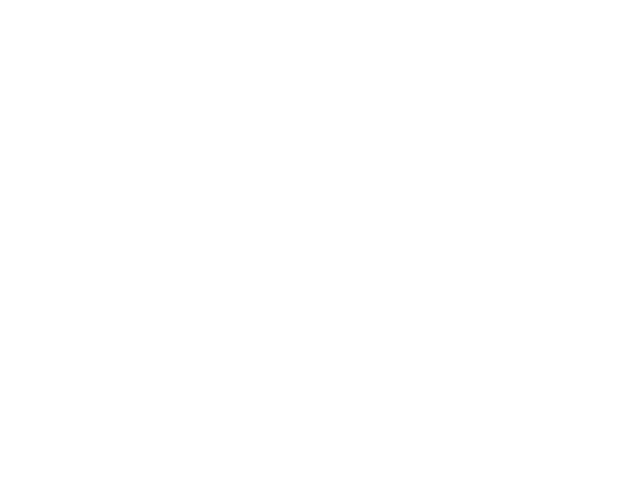

In [69]:
r = trained_model_G1_M1.model.predict(test_features)

x = test_labels.flatten()
y = r.flatten()
d = np.column_stack((x,y))
%matplotlib notebook
cv_time = output_times[training_size:test_size,:].flatten()
pd.DataFrame(index=cv_time,data=d).plot(kind=("line"))

**This is looking at the holdout CV prediction on a model**

/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/keras/engine/sequential.py:109: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


<IPython.core.display.Javascript object>


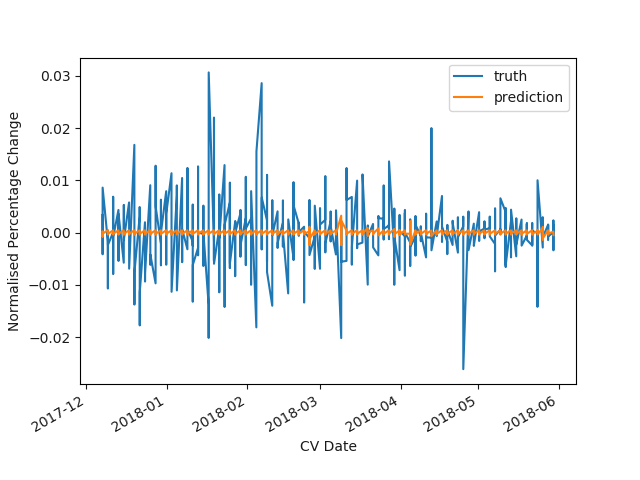

In [70]:
import seaborn as sns

cv_time = output_times[test_size:validation_size,:].flatten()

validation_predictions = trained_model_G2_M0.model.predict(validation_features)

x = validation_labels.flatten()
y = validation_predictions.flatten()
d = np.column_stack((x,y))

%matplotlib notebook
ax = pd.DataFrame(index=cv_time,data=d,columns=["truth","prediction"]).plot(kind=("line"))
ax.set_xlabel("CV Date")
ax.set_ylabel("Normalised Percentage Change")
sns.set(font_scale=1.2)
sns.set_style("white")

### Architecture Summary

In [71]:
print("G1_M0")

trained_model_G1_M0.summary()
print("G1_M1")

trained_model_G1_M1.summary()
print("G1_M2")

trained_model_G1_M2.summary()
print("G1_M3")

trained_model_G1_M3.summary()
print("G2_M0")

trained_model_G2_M0.summary()
print("G2_M1")

trained_model_G2_M1.summary()
print("G2_M2")

trained_model_G2_M2.summary()
print("G2_M3")

trained_model_G2_M3.summary()
print("G3_M0")

trained_model_G3_M0.summary()
print("G3_M1")

trained_model_G3_M1.summary()
print("G3_M2")

trained_model_G3_M2.summary()
print("G4_M0")

trained_model_G4_M0.summary()
print("G4_M1")

trained_model_G4_M1.summary()
print("G4_M2")

trained_model_G4_M2.summary()
print("G4_M3")

trained_model_G4_M3.summary()
print("G4_M4")
trained_model_G4_M4.summary()


G1_M0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_157 (Conv1D)          (None, 141, 8)            456       
_________________________________________________________________
conv1d_158 (Conv1D)          (None, 70, 16)            272       
_________________________________________________________________
flatten_49 (Flatten)         (None, 1120)              0         
_________________________________________________________________
dense_58 (Dense)             (None, 6)                 6726      
Total params: 7,454
Trainable params: 7,454
Non-trainable params: 0
_________________________________________________________________
G1_M1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_159 (Conv1D)          (None, 141, 8)            456       
______________________________________________________________

## T3: Predict Up/Down Movement

In [72]:
# True -> 1 hour later it was more 
# False -> 1 hour later it was less
Y_up = Y_eth[:,0]-Y_eth[:,-1] < 0

In [73]:
Y_up = Y_up.astype(int)

In [74]:
Y_up.sum()

213

In [75]:
Y_up.shape

(429,)

In [76]:
# set sizes

# training percentage
training_p = 0.6

# remove percentage change from the features to avoid model cheating in the form of shifting 
X_temp = X[:,:,eth_ud_indices]

training_size = int(training_p* X_temp.shape[0])
remaining_size = X_temp.shape[0] - training_size
test_size = int(remaining_size/2) + training_size
validation_size = int(remaining_size/2) + test_size


#split training validation
training_features = X_temp[:training_size,:]
training_labels = Y_up[:training_size]

# test set
test_features = X_temp[training_size:test_size,:]
test_labels = Y_up[training_size:test_size]

# validation set
validation_features = X_temp[test_size:validation_size,:]
validation_labels = Y_up[test_size:validation_size]


In [77]:
epochs = 100
deep_epochs = 200
step_size = X_temp.shape[1]
batch_size= 8
nb_features = X_temp.shape[2]

### Train

**Temporal Golden Rule 2:**
* Temporal Training Order: It can not train and predict on future data and then train and predict on past data.

In [78]:
checkpointer_G1_M0 = create_checkpoint("G1M0","up-down")
checkpointer_G1_M1 = create_checkpoint("G1M1","up-down")
checkpointer_G1_M2 = create_checkpoint("G1M2","up-down")
checkpointer_G1_M3 = create_checkpoint("G1M3","up-down")

checkpointer_G2_M0 = create_checkpoint("G2M0","up-down")
checkpointer_G2_M1 = create_checkpoint("G2M1","up-down")
checkpointer_G2_M2 = create_checkpoint("G2M2","up-down")
checkpointer_G2_M3 = create_checkpoint("G2M3","up-down")

checkpointer_G3_M0 = create_checkpoint("G3M0","up-down")
checkpointer_G3_M1 = create_checkpoint("G3M1","up-down")
checkpointer_G3_M2 = create_checkpoint("G3M2","up-down")


checkpointer_G4_M0 = create_checkpoint("G4M0","up-down")
checkpointer_G4_M1 = create_checkpoint("G4M1","up-down")
checkpointer_G4_M2 = create_checkpoint("G4M2","up-down")
checkpointer_G4_M3 = create_checkpoint("G4M3","up-down")
checkpointer_G4_M4 = create_checkpoint("G4M4","up-down")

directory: model_weights/cnnG1M0.up-down.weights.hdf5
directory: model_weights/cnnG1M1.up-down.weights.hdf5
directory: model_weights/cnnG1M2.up-down.weights.hdf5
directory: model_weights/cnnG1M3.up-down.weights.hdf5
directory: model_weights/cnnG2M0.up-down.weights.hdf5
directory: model_weights/cnnG2M1.up-down.weights.hdf5
directory: model_weights/cnnG2M2.up-down.weights.hdf5
directory: model_weights/cnnG2M3.up-down.weights.hdf5
directory: model_weights/cnnG3M0.up-down.weights.hdf5
directory: model_weights/cnnG3M1.up-down.weights.hdf5
directory: model_weights/cnnG3M2.up-down.weights.hdf5
directory: model_weights/cnnG4M0.up-down.weights.hdf5
directory: model_weights/cnnG4M1.up-down.weights.hdf5
directory: model_weights/cnnG4M2.up-down.weights.hdf5
directory: model_weights/cnnG4M3.up-down.weights.hdf5
directory: model_weights/cnnG4M4.up-down.weights.hdf5


In [79]:
model_G1_M0 = compile_model_G1_M0(True)
model_G1_M1 = compile_model_G1_M1(True) 
model_G1_M2 = compile_model_G1_M2(True)
model_G1_M3 = compile_model_G1_M3(True)

model_G2_M0 = compile_model_G2_M0(True)
model_G2_M1 = compile_model_G2_M1(True)
model_G2_M2 = compile_model_G2_M2(True)
model_G2_M3 = compile_model_G2_M3(True)

model_G3_M0 = compile_model_G3_M0(True)
model_G3_M1 = compile_model_G3_M1(True)
model_G3_M2 = compile_model_G3_M2(True)


model_G4_M0 = compile_model_G4_M0(True)
model_G4_M1 = compile_model_G4_M1(True)
model_G4_M2 = compile_model_G4_M2(True)
model_G4_M3 = compile_model_G4_M3(True)
model_G4_M4 = compile_model_G4_M4(True)

In [80]:
X_train = training_features
Y_train = training_labels
X_test = test_features
Y_test = test_labels

trained_model_G1_M0 = train_model(model_G1_M0,checkpointer_G1_M0,X_train,Y_train,X_test,Y_test)
print("done G1M0")
trained_model_G1_M1 = train_model(model_G1_M1,checkpointer_G1_M1,X_train,Y_train,X_test,Y_test)
print("done G1M1")
trained_model_G1_M2 = train_model(model_G1_M2,checkpointer_G1_M2,X_train,Y_train,X_test,Y_test)
print("done G1M2")
trained_model_G1_M3 = train_model(model_G1_M3,checkpointer_G1_M3,X_train,Y_train,X_test,Y_test)
print("done G1M3")


trained_model_G2_M0 = train_model(model_G2_M0,checkpointer_G2_M0,X_train,Y_train,X_test,Y_test)
print("done G2M0")
trained_model_G2_M1 = train_model(model_G2_M1,checkpointer_G2_M1,X_train,Y_train,X_test,Y_test)
print("done G2M1")
trained_model_G2_M2 = train_model(model_G2_M2,checkpointer_G2_M2,X_train,Y_train,X_test,Y_test)
print("done G2M2")
trained_model_G2_M3 = train_model(model_G2_M3,checkpointer_G2_M3,X_train,Y_train,X_test,Y_test)
print("done G2M3")


trained_model_G3_M0 = train_model(model_G3_M0,checkpointer_G3_M0,X_train,Y_train,X_test,Y_test)
print("done G3M0")
trained_model_G3_M1 = train_model(model_G3_M1,checkpointer_G3_M1,X_train,Y_train,X_test,Y_test)
print("done G3M1")
trained_model_G3_M2 = train_model(model_G3_M2,checkpointer_G3_M2,X_train,Y_train,X_test,Y_test)
print("done G3M2")

trained_model_G4_M0 = train_model(model_G4_M0,checkpointer_G4_M0,X_train,Y_train,X_test,Y_test)
print("done G4M0")
trained_model_G4_M1 = train_model(model_G4_M1,checkpointer_G4_M1,X_train,Y_train,X_test,Y_test)
print("done G4M1")
trained_model_G4_M2 = train_model(model_G4_M2,checkpointer_G4_M2,X_train,Y_train,X_test,Y_test)
print("done G4M2")
trained_model_G4_M3 = train_model(model_G4_M3,checkpointer_G4_M3,X_train,Y_train,X_test,Y_test)
print("done G4M3")
trained_model_G4_M4 = train_model(model_G4_M4,checkpointer_G4_M4,X_train,Y_train,X_test,Y_test)
print("done G4M4")

done G1M0
done G1M1
done G1M2
done G1M3
done G2M0
done G2M1
done G2M2
done G2M3
done G3M0
done G3M1
done G3M2
done G4M0
done G4M1
done G4M2
done G4M3
done G4M4


### Results

In [81]:
# make sure to reload the data at the begingin of section 9.1
trained_model_G1_M0= compile_model_G1_M0(True)
trained_model_G1_M1= compile_model_G1_M1(True)
trained_model_G1_M2= compile_model_G1_M2(True)
trained_model_G1_M3= compile_model_G1_M3(True)
trained_model_G2_M0= compile_model_G2_M0(True)
trained_model_G2_M1= compile_model_G2_M1(True)
trained_model_G2_M2= compile_model_G2_M2(True)
trained_model_G2_M3= compile_model_G2_M3(True)
trained_model_G3_M0= compile_model_G3_M0(True)
trained_model_G3_M1= compile_model_G3_M1(True)
trained_model_G3_M2= compile_model_G3_M2(True)
trained_model_G4_M0= compile_model_G4_M0(True)
trained_model_G4_M1= compile_model_G4_M1(True)
trained_model_G4_M2= compile_model_G4_M2(True)
trained_model_G4_M3= compile_model_G4_M3(True)
trained_model_G4_M4= compile_model_G4_M4(True)

trained_model_G1_M0.model.load_weights('model_weights/cnnG1M0.up-down.weights.hdf5')
trained_model_G1_M1.model.load_weights('model_weights/cnnG1M1.up-down.weights.hdf5')
trained_model_G1_M2.model.load_weights('model_weights/cnnG1M2.up-down.weights.hdf5')
trained_model_G1_M3.model.load_weights('model_weights/cnnG1M3.up-down.weights.hdf5')

trained_model_G2_M0.model.load_weights('model_weights/cnnG2M0.up-down.weights.hdf5')
trained_model_G2_M1.model.load_weights('model_weights/cnnG2M1.up-down.weights.hdf5')
trained_model_G2_M2.model.load_weights('model_weights/cnnG2M2.up-down.weights.hdf5')
trained_model_G2_M3.model.load_weights('model_weights/cnnG2M3.up-down.weights.hdf5')

trained_model_G3_M0.model.load_weights('model_weights/cnnG3M0.up-down.weights.hdf5')
trained_model_G3_M1.model.load_weights('model_weights/cnnG3M1.up-down.weights.hdf5')
trained_model_G3_M2.model.load_weights('model_weights/cnnG3M2.up-down.weights.hdf5')


trained_model_G4_M0.model.load_weights('model_weights/cnnG4M0.up-down.weights.hdf5')
trained_model_G4_M1.model.load_weights('model_weights/cnnG4M1.up-down.weights.hdf5')
trained_model_G4_M2.model.load_weights('model_weights/cnnG4M2.up-down.weights.hdf5')
trained_model_G4_M3.model.load_weights('model_weights/cnnG4M3.up-down.weights.hdf5')
trained_model_G4_M4.model.load_weights('model_weights/cnnG4M4.up-down.weights.hdf5')

/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/keras/engine/sequential.py:109: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '
/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/keras/engine/sequential.py:109: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '
/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/keras/engine/sequential.py:109: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '
/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/keras/engine/sequential.py:109: UserWarning: `Sequential.model` i

In [82]:
## get the F1 scores for test and CV data
from sklearn.metrics import f1_score



t_G1_M0_predictions = trained_model_G1_M0.model.predict(test_features, verbose=0)
t_G1_M1_predictions = trained_model_G1_M1.model.predict(test_features, verbose=0)
t_G1_M2_predictions = trained_model_G1_M2.model.predict(test_features, verbose=0)
t_G1_M3_predictions = trained_model_G1_M3.model.predict(test_features, verbose=0)

t_G2_M0_predictions = trained_model_G2_M0.model.predict(test_features, verbose=0)
t_G2_M1_predictions = trained_model_G2_M1.model.predict(test_features, verbose=0)
t_G2_M2_predictions = trained_model_G2_M2.model.predict(test_features, verbose=0)
t_G2_M3_predictions = trained_model_G2_M3.model.predict(test_features, verbose=0)

t_G3_M0_predictions = trained_model_G3_M0.model.predict(test_features, verbose=0)
t_G3_M1_predictions = trained_model_G3_M1.model.predict(test_features, verbose=0)
t_G3_M2_predictions = trained_model_G3_M2.model.predict(test_features, verbose=0)

t_G4_M0_predictions = trained_model_G4_M0.model.predict(test_features, verbose=0)
t_G4_M1_predictions = trained_model_G4_M1.model.predict(test_features, verbose=0)
t_G4_M2_predictions = trained_model_G4_M2.model.predict(test_features, verbose=0)
t_G4_M3_predictions = trained_model_G4_M3.model.predict(test_features, verbose=0)
t_G4_M4_predictions = trained_model_G4_M4.model.predict(test_features, verbose=0)

t_G1_M0 = f1_score(test_labels,t_G1_M0_predictions)
t_G1_M1 = f1_score(test_labels,t_G1_M1_predictions)
t_G1_M2 = f1_score(test_labels,t_G1_M2_predictions)
t_G1_M3 = f1_score(test_labels,t_G1_M3_predictions)
t_G2_M0 = f1_score(test_labels,t_G2_M0_predictions)
t_G2_M1 = f1_score(test_labels,t_G2_M1_predictions)
t_G2_M2 = f1_score(test_labels,t_G2_M2_predictions)
t_G2_M3 = f1_score(test_labels,t_G2_M3_predictions)
t_G3_M0 = f1_score(test_labels,t_G3_M0_predictions)
t_G3_M1 = f1_score(test_labels,t_G3_M1_predictions)
t_G3_M2 = f1_score(test_labels,t_G3_M2_predictions)
t_G4_M0 = f1_score(test_labels,t_G4_M0_predictions)
t_G4_M1 = f1_score(test_labels,t_G4_M1_predictions)
t_G4_M2 = f1_score(test_labels,t_G4_M2_predictions)
t_G4_M3 = f1_score(test_labels,t_G4_M3_predictions)
t_G4_M4 = f1_score(test_labels,t_G4_M4_predictions)


cv_G1_M0_predictions = trained_model_G1_M0.model.predict(validation_features, verbose=0)
cv_G1_M1_predictions = trained_model_G1_M1.model.predict(validation_features, verbose=0)
cv_G1_M2_predictions = trained_model_G1_M2.model.predict(validation_features, verbose=0)
cv_G1_M3_predictions = trained_model_G1_M3.model.predict(validation_features, verbose=0)

cv_G2_M0_predictions = trained_model_G2_M0.model.predict(validation_features, verbose=0)
cv_G2_M1_predictions = trained_model_G2_M1.model.predict(validation_features, verbose=0)
cv_G2_M2_predictions = trained_model_G2_M2.model.predict(validation_features, verbose=0)
cv_G2_M3_predictions = trained_model_G2_M3.model.predict(validation_features, verbose=0)

cv_G3_M0_predictions = trained_model_G3_M0.model.predict(validation_features, verbose=0)
cv_G3_M1_predictions = trained_model_G3_M1.model.predict(validation_features, verbose=0)
cv_G3_M2_predictions = trained_model_G3_M2.model.predict(validation_features, verbose=0)

cv_G4_M0_predictions = trained_model_G4_M0.model.predict(validation_features, verbose=0)
cv_G4_M1_predictions = trained_model_G4_M1.model.predict(validation_features, verbose=0)
cv_G4_M2_predictions = trained_model_G4_M2.model.predict(validation_features, verbose=0)
cv_G4_M3_predictions = trained_model_G4_M3.model.predict(validation_features, verbose=0)
cv_G4_M4_predictions = trained_model_G4_M4.model.predict(validation_features, verbose=0)


cv_G1_M0 = f1_score(validation_labels,cv_G1_M0_predictions)
cv_G1_M1 = f1_score(validation_labels,cv_G1_M1_predictions)
cv_G1_M2 = f1_score(validation_labels,cv_G1_M2_predictions)
cv_G1_M3 = f1_score(validation_labels,cv_G1_M3_predictions)
cv_G2_M0 = f1_score(validation_labels,cv_G2_M0_predictions)
cv_G2_M1 = f1_score(validation_labels,cv_G2_M1_predictions)
cv_G2_M2 = f1_score(validation_labels,cv_G2_M2_predictions)
cv_G2_M3 = f1_score(validation_labels,cv_G2_M3_predictions)
cv_G3_M0 = f1_score(validation_labels,cv_G3_M0_predictions)
cv_G3_M1 = f1_score(validation_labels,cv_G3_M1_predictions)
cv_G3_M2 = f1_score(validation_labels,cv_G3_M2_predictions)
cv_G4_M0 = f1_score(validation_labels,cv_G4_M0_predictions)
cv_G4_M1 = f1_score(validation_labels,cv_G4_M1_predictions)
cv_G4_M2 = f1_score(validation_labels,cv_G4_M2_predictions)
cv_G4_M3 = f1_score(validation_labels,cv_G4_M3_predictions)
cv_G4_M4 = f1_score(validation_labels,cv_G4_M4_predictions)

/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/keras/engine/sequential.py:109: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '
/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/keras/engine/sequential.py:109: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '
/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/keras/engine/sequential.py:109: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '
/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/keras/engine/sequential.py:109: UserWarning: `Sequential.model` i

/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/keras/engine/sequential.py:109: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '
/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/keras/engine/sequential.py:109: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '
/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/keras/engine/sequential.py:109: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


In [83]:
# get the number of paramaters
G1_M0_param = trained_model_G1_M0.model.count_params()
G1_M1_param = trained_model_G1_M1.model.count_params()
G1_M2_param = trained_model_G1_M2.model.count_params()
G1_M3_param = trained_model_G1_M3.model.count_params()
G2_M0_param = trained_model_G2_M0.model.count_params()
G2_M1_param = trained_model_G2_M1.model.count_params()
G2_M2_param = trained_model_G2_M2.model.count_params()
G2_M3_param = trained_model_G2_M3.model.count_params()
G3_M0_param = trained_model_G3_M0.model.count_params()
G3_M1_param = trained_model_G3_M1.model.count_params()
G3_M2_param = trained_model_G3_M2.model.count_params()
G4_M0_param = trained_model_G4_M0.model.count_params()
G4_M1_param = trained_model_G4_M1.model.count_params()
G4_M2_param = trained_model_G4_M2.model.count_params()
G4_M3_param = trained_model_G4_M3.model.count_params()
G4_M4_param = trained_model_G4_M4.model.count_params()

/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/keras/engine/sequential.py:109: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '
/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/keras/engine/sequential.py:109: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '
/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/keras/engine/sequential.py:109: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '
/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/keras/engine/sequential.py:109: UserWarning: `Sequential.model` i

In [84]:
import pandas as pd
df = pd.DataFrame(columns=["model","number of convolution layers","filters at each layer","activation function",
                           "number of dense layers","number of paramaters","drop out","F1 test score",
                           "F1 cv score"])

cv = [cv_G1_M0,cv_G1_M1,cv_G1_M2,cv_G1_M3,
      cv_G1_M0,cv_G2_M1,cv_G2_M2,cv_G2_M3,
      cv_G3_M0,cv_G3_M1,cv_G3_M2,
      cv_G4_M0,cv_G4_M1,cv_G4_M2,cv_G4_M3,cv_G4_M4]

ts = [t_G1_M0,t_G1_M1,t_G1_M2,t_G1_M3,
      t_G2_M0,t_G2_M1,t_G2_M2,t_G2_M3,
      t_G3_M0,t_G3_M1,t_G3_M2,
      t_G4_M0,t_G4_M1,t_G4_M2,t_G4_M3,t_G4_M3,t_G4_M4
     ]

cv_name = ["CNN:G1M0","CNN:G1M1","CNN:G1M2","CNN:G1M3",
           "CNN:G2M0","CNN:G2M1","CNN:G2M2","CNN:G2M3",
           "CNN:G3M0","CNN:G3M1","CNN:G3M2",
           "CNN:G4M0","CNN:G4M1","CNN:G4M2","CNN:G4M3","CNN:G4M4"]

layers = ["2","3","4","5",
          "2","3","4","5",
          "3","4","2",
         "2","3","4","5","1"]

drop_out = ["false","false","false","false",
            "true","true","true","true",
            "false","false","false",
            "false","false","false","false","false"]

filter_sizing = ["8,16","8,16,32","8,16,32,64","8,16,32,64,128",
                 "8,16","8,16,32","8,16,32,64","8,16,32,64,128",
                 "8,16,16","8,16,32,32","6,6",
                 "8,16","8,16,32","8,16,32,64","8,16,32,64,128","1"]

no_dense = ["1","1","1","1",
            "1","1","1","1",
            "1","1","4",
           "1","1","1","1","1"]

paramaters = [G1_M0_param,G1_M1_param,G1_M2_param,G1_M3_param,
G2_M0_param,G2_M1_param,G2_M2_param,G2_M3_param,
G3_M0_param,G3_M1_param,G3_M2_param,
G4_M0_param,G4_M1_param,G4_M2_param,G4_M3_param,G4_M4_param]

activation = ["relu","relu","relu","relu",
              "relu","relu","relu","relu",
              "relu","relu","relu",
              "leakyrelu","leakyrelu","leakyrelu","leakyrelu","linear"]


row = zip(cv,ts,cv_name,layers,drop_out,filter_sizing,no_dense,paramaters,activation)

for cv_scores,test_score,model_name,layers,drop_out,filter_sizing,no_dense,paramaters,activation_function in row :
    #metric_scores
    
    df = df.append({
         "model":model_name,
        "number of convolution layers":layers,
        "drop out":drop_out,
        "F1 test score":test_score,
        "F1 cv score":cv_scores,
        "filters at each layer":filter_sizing,
        "number of dense layers":no_dense,
        "number of paramaters":paramaters,
        "activation function":activation_function
          }, ignore_index=True)

    
df

,model,number of convolution layers,filters at each layer,activation function,number of dense layers,number of paramaters,drop out,F1 test score,F1 cv score
0,CNN:G1M0,2,"8,16",relu,1,1849,false,0.676923,0.744526
1,CNN:G1M1,3,"8,16,32",relu,1,2905,false,0.676923,0.744526
2,CNN:G1M2,4,"8,16,32,64",relu,1,7033,false,0.676923,0.744526
3,CNN:G1M3,5,"8,16,32,64,128",relu,1,23481,false,0.676923,0.744526
4,CNN:G2M0,2,"8,16",relu,1,1849,true,0.676923,0.744526
5,CNN:G2M1,3,"8,16,32",relu,1,2905,true,0.676923,0.744526
6,CNN:G2M2,4,"8,16,32,64",relu,1,7033,true,0.676923,0.744526
7,CNN:G2M3,5,"8,16,32,64,128",relu,1,23481,true,0.676923,0.744526
8,CNN:G3M0,3,"8,16,16",relu,1,1817,false,0.676923,0.744526
9,CNN:G3M1,4,"8,16,32,32",relu,1,4409,false,0.676923,0.744526


### Architecture Summaries 

In [85]:
print("G1_M0")

trained_model_G1_M0.summary()
print("G1_M1")

trained_model_G1_M1.summary()
print("G1_M2")

trained_model_G1_M2.summary()
print("G1_M3")

trained_model_G1_M3.summary()
print("G2_M0")

trained_model_G2_M0.summary()
print("G2_M1")

trained_model_G2_M1.summary()
print("G2_M2")

trained_model_G2_M2.summary()
print("G2_M3")

trained_model_G2_M3.summary()
print("G3_M0")

trained_model_G3_M0.summary()
print("G3_M1")

trained_model_G3_M1.summary()
print("G3_M2")

trained_model_G3_M2.summary()
print("G4_M0")

trained_model_G4_M0.summary()
print("G4_M1")

trained_model_G4_M1.summary()
print("G4_M2")

trained_model_G4_M2.summary()
print("G4_M3")

trained_model_G4_M3.summary()
print("G4_M4")
trained_model_G4_M4.summary()


G1_M0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_261 (Conv1D)          (None, 141, 8)            456       
_________________________________________________________________
conv1d_262 (Conv1D)          (None, 70, 16)            272       
_________________________________________________________________
flatten_81 (Flatten)         (None, 1120)              0         
_________________________________________________________________
dense_96 (Dense)             (None, 1)                 1121      
_________________________________________________________________
softmax_17 (Softmax)         (None, 1)                 0         
Total params: 1,849
Trainable params: 1,849
Non-trainable params: 0
_________________________________________________________________
G1_M1
_________________________________________________________________
Layer (type)                 Output Shape              Param #